## **Index Tracking and Forward Testing**

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
components = pd.read_csv('Component_prices.csv', parse_dates = ["Date"], index_col = "Date")
ibov = pd.read_csv('BVSP.csv', parse_dates = ["Date"], index_col = "Date")

In [3]:
components.head()

ABEV3.SA  AZUL4.SA  B3SA3.SA   BBAS3.SA  BBDC3.SA   BBDC4.SA  \
Date                                                                       
2010-01-04  6.113138       NaN     12.95  29.900000  9.076981  13.379374   
2010-01-05  6.149098       NaN     13.00  29.600000  8.948147  13.308395   
2010-01-06  6.211828       NaN     13.49  29.639999  8.895441  13.201928   
2010-01-07  6.240995       NaN     13.81  29.650000  8.874945  13.166439   
2010-01-08  6.229008       NaN     13.49  29.820000  8.886657  13.152244   

            BBSE3.SA  BEEF3.SA  BPAC11.SA   BRAP4.SA  ...  SANB11.SA  \
Date                                                  ...              
2010-01-04       NaN  5.722775        NaN  34.705620  ...  23.750000   
2010-01-05       NaN  5.948933        NaN  35.405045  ...  23.980000   
2010-01-06       NaN  6.243922        NaN  35.900841  ...  23.860001   
2010-01-07       NaN  6.381583        NaN  36.299248  ...  23.690001   
2010-01-08       NaN  6.784734        NaN  36.830456  ...  23.450001   

             SBSP3.SA   SUZB3.SA  TAEE11.SA  TOTS3.SA  UGPA3.SA   USIM5.SA  \
Date                                                                         
2010-01-04  11.316666  16.007999  12.490000  7.951558    7.3125  25.500000   
2010-01-05  11.333333  16.007999  12.493333  7.818478    7.3125  25.575001   
2010-01-06  11.330000  16.007999  12.493333  7.865056    7.3125  25.549999   
2010-01-07  11.150000  16.007999  12.493333  7.871710    7.3125  25.790001   
2010-01-08  11.336666  16.007999  12.466666  7.948231    7.3125  25.424999   

             VALE3.SA  WEGE3.SA  YDUQ3.SA  
Date                                       
2010-01-04  51.490002  2.711538  8.070000  
2010-01-05  51.970001  2.705621  8.166666  
2010-01-06  53.070000  2.720414  8.300000  
2010-01-07  53.290001  2.766272  8.166666  
2010-01-08  53.810001  2.866863  8.166666  

[5 rows x 65 columns]

In [4]:
components.tail()

ABEV3.SA  AZUL4.SA  B3SA3.SA   BBAS3.SA  BBDC3.SA  BBDC4.SA  \
Date                                                                      
2023-01-20     13.53     11.25     12.77  40.070000     12.86     14.67   
2023-01-23     13.42     11.38     12.65  39.770000     12.45     14.05   
2023-01-24     13.61     11.74     12.84  39.570000     12.59     14.17   
2023-01-25     13.71     11.99     13.11  40.650002     12.61     14.10   
2023-01-26     13.74     12.04     13.12  40.630001     12.58     14.14   

             BBSE3.SA  BEEF3.SA  BPAC11.SA   BRAP4.SA  ...  SANB11.SA  \
Date                                                   ...              
2023-01-20  35.040001     15.51  21.389999  32.029999  ...  29.180000   
2023-01-23  35.320000     14.96  20.930000  31.620001  ...  28.110001   
2023-01-24  35.700001     14.73  21.209999  31.980000  ...  28.650000   
2023-01-25  37.180000     14.87  21.760000  32.230000  ...  28.889999   
2023-01-26  37.060001     14.75  21.660000  32.860001  ...  29.030001   

             SBSP3.SA   SUZB3.SA  TAEE11.SA   TOTS3.SA  UGPA3.SA  USIM5.SA  \
Date                                                                         
2023-01-20  53.599998  47.139999  35.220001  29.100000     12.62      8.29   
2023-01-23  52.389999  46.980000  35.540001  29.639999     12.44      8.34   
2023-01-24  53.830002  47.509998  35.720001  30.219999     12.97      8.27   
2023-01-25  54.540001  46.770000  35.830002  29.990000     13.16      8.28   
2023-01-26  54.060001  45.400002  36.270000  29.520000     13.15      8.59   

             VALE3.SA   WEGE3.SA  YDUQ3.SA  
Date                                        
2023-01-20  93.989998  37.330002      9.42  
2023-01-23  94.300003  37.369999      9.38  
2023-01-24  95.300003  37.209999      9.55  
2023-01-25  96.199997  38.720001      9.62  
2023-01-26  98.000000  38.209999      9.60  

[5 rows x 65 columns]

In [5]:
# Some stocks have high numbers of missing values

components.isna().sum().nlargest(20)

NTCO3.SA     2473
HAPV3.SA     2065
IRBR3.SA     1876
CRFB3.SA     1869
AZUL4.SA     1800
BPAC11.SA    1770
RAIL3.SA     1299
KLBN11.SA    1004
CVCB3.SA      975
BBSE3.SA      820
COGN3.SA      544
QUAL3.SA      368
MGLU3.SA      327
ECOR3.SA       60
B3SA3.SA        2
ABEV3.SA        0
BBAS3.SA        0
BBDC3.SA        0
BBDC4.SA        0
BEEF3.SA        0
dtype: int64

In [6]:
# Dropping the stocks columns with missing values above 15%

missing_values = components.isna().sum() / len(components)
cols_to_drop = missing_values[missing_values > 0.15].index
components = components.drop(cols_to_drop, axis=1)

In [7]:
components.isna().sum().nlargest(20)

QUAL3.SA    368
MGLU3.SA    327
ECOR3.SA     60
B3SA3.SA      2
ABEV3.SA      0
BBAS3.SA      0
BBDC3.SA      0
BBDC4.SA      0
BEEF3.SA      0
BRAP4.SA      0
BRFS3.SA      0
BRKM5.SA      0
BRSR6.SA      0
CCRO3.SA      0
CIEL3.SA      0
CMIG4.SA      0
CPFE3.SA      0
CSAN3.SA      0
CSNA3.SA      0
CYRE3.SA      0
dtype: int64

In [8]:
ibov.head()

Open     High      Low    Close  Adj Close   Volume
Date                                                              
2010-01-04  68587.0  70081.0  68587.0  70045.0    70045.0  1655400
2010-01-05  70046.0  70595.0  69928.0  70240.0    70240.0  1984200
2010-01-06  70237.0  70937.0  70016.0  70729.0    70729.0  2243600
2010-01-07  70723.0  70723.0  70045.0  70451.0    70451.0  1555000
2010-01-08  70455.0  70766.0  70158.0  70263.0    70263.0  1634400

In [9]:
ibov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3235 entries, 2010-01-04 to 2023-01-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3235 non-null   float64
 1   High       3235 non-null   float64
 2   Low        3235 non-null   float64
 3   Close      3235 non-null   float64
 4   Adj Close  3235 non-null   float64
 5   Volume     3235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 176.9 KB


In [10]:
# We are only interested in the 'close' prices

ibov = ibov.loc[:, 'Close']
ibov

Date
2010-01-04     70045.0
2010-01-05     70240.0
2010-01-06     70729.0
2010-01-07     70451.0
2010-01-08     70263.0
                ...   
2023-01-20    112301.0
2023-01-23    111709.0
2023-01-24    113028.0
2023-01-25    114195.0
2023-01-26    114109.0
Name: Close, Length: 3235, dtype: float64

In [11]:
df = pd.concat([components, ibov], axis=1)
df

ABEV3.SA  B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA   BEEF3.SA  \
Date                                                                          
2010-01-04   6.113138     12.95  29.900000   9.076981  13.379374   5.722775   
2010-01-05   6.149098     13.00  29.600000   8.948147  13.308395   5.948933   
2010-01-06   6.211828     13.49  29.639999   8.895441  13.201928   6.243922   
2010-01-07   6.240995     13.81  29.650000   8.874945  13.166439   6.381583   
2010-01-08   6.229008     13.49  29.820000   8.886657  13.152244   6.784734   
...               ...       ...        ...        ...        ...        ...   
2023-01-20  13.530000     12.77  40.070000  12.860000  14.670000  15.510000   
2023-01-23  13.420000     12.65  39.770000  12.450000  14.050000  14.960000   
2023-01-24  13.610000     12.84  39.570000  12.590000  14.170000  14.730000   
2023-01-25  13.710000     13.11  40.650002  12.610000  14.100000  14.870000   
2023-01-26  13.740000     13.12  40.630001  12.580000  14.140000  14.750000   

             BRAP4.SA   BRFS3.SA   BRKM5.SA  BRSR6.SA  ...   SBSP3.SA  \
Date                                                   ...              
2010-01-04  34.705620  22.895000  14.250000     14.60  ...  11.316666   
2010-01-05  35.405045  23.135000  14.120000     14.30  ...  11.333333   
2010-01-06  35.900841  23.450001  14.460000     14.35  ...  11.330000   
2010-01-07  36.299248  23.305000  14.100000     14.10  ...  11.150000   
2010-01-08  36.830456  23.400000  13.900000     14.00  ...  11.336666   
...               ...        ...        ...       ...  ...        ...   
2023-01-20  32.029999   7.900000  21.459999      9.65  ...  53.599998   
2023-01-23  31.620001   7.790000  21.660000      9.40  ...  52.389999   
2023-01-24  31.980000   8.020000  22.980000      9.52  ...  53.830002   
2023-01-25  32.230000   8.140000  22.650000      9.58  ...  54.540001   
2023-01-26  32.860001   8.200000  22.730000      9.79  ...  54.060001   

             SUZB3.SA  TAEE11.SA   TOTS3.SA  UGPA3.SA   USIM5.SA   VALE3.SA  \
Date                                                                          
2010-01-04  16.007999  12.490000   7.951558    7.3125  25.500000  51.490002   
2010-01-05  16.007999  12.493333   7.818478    7.3125  25.575001  51.970001   
2010-01-06  16.007999  12.493333   7.865056    7.3125  25.549999  53.070000   
2010-01-07  16.007999  12.493333   7.871710    7.3125  25.790001  53.290001   
2010-01-08  16.007999  12.466666   7.948231    7.3125  25.424999  53.810001   
...               ...        ...        ...       ...        ...        ...   
2023-01-20  47.139999  35.220001  29.100000   12.6200   8.290000  93.989998   
2023-01-23  46.980000  35.540001  29.639999   12.4400   8.340000  94.300003   
2023-01-24  47.509998  35.720001  30.219999   12.9700   8.270000  95.300003   
2023-01-25  46.770000  35.830002  29.990000   13.1600   8.280000  96.199997   
2023-01-26  45.400002  36.270000  29.520000   13.1500   8.590000  98.000000   

             WEGE3.SA  YDUQ3.SA     Close  
Date                                       
2010-01-04   2.711538  8.070000   70045.0  
2010-01-05   2.705621  8.166666   70240.0  
2010-01-06   2.720414  8.300000   70729.0  
2010-01-07   2.766272  8.166666   70451.0  
2010-01-08   2.866863  8.166666   70263.0  
...               ...       ...       ...  
2023-01-20  37.330002  9.420000  112301.0  
2023-01-23  37.369999  9.380000  111709.0  
2023-01-24  37.209999  9.550000  113028.0  
2023-01-25  38.720001  9.620000  114195.0  
2023-01-26  38.209999  9.600000  114109.0  

[3244 rows x 55 columns]

In [12]:
df.rename({'Close': 'IBOV'}, axis=1, inplace=True)

In [13]:
info = pd.read_csv('Components.csv')
info.head()

Código             Ação  \
0  ABEV3.SA        AMBEV S/A   
1  AZUL4.SA             AZUL   
2  B3SA3.SA               B3   
3  BBAS3.SA  BANCO DO BRASIL   
4  BBDC3.SA         BRADESCO   

                                               Setor  
0  Consumo não Cíclico / Bebidas / Cervejas e Ref...  
1   Bens Industriais / Transporte / Transporte Aéreo  
2  Financeiro e Outros / Serviços Financeiros Div...  
3  Financeiro e Outros / Intermediários Financeir...  
4  Financeiro e Outros / Intermediários Financeir...

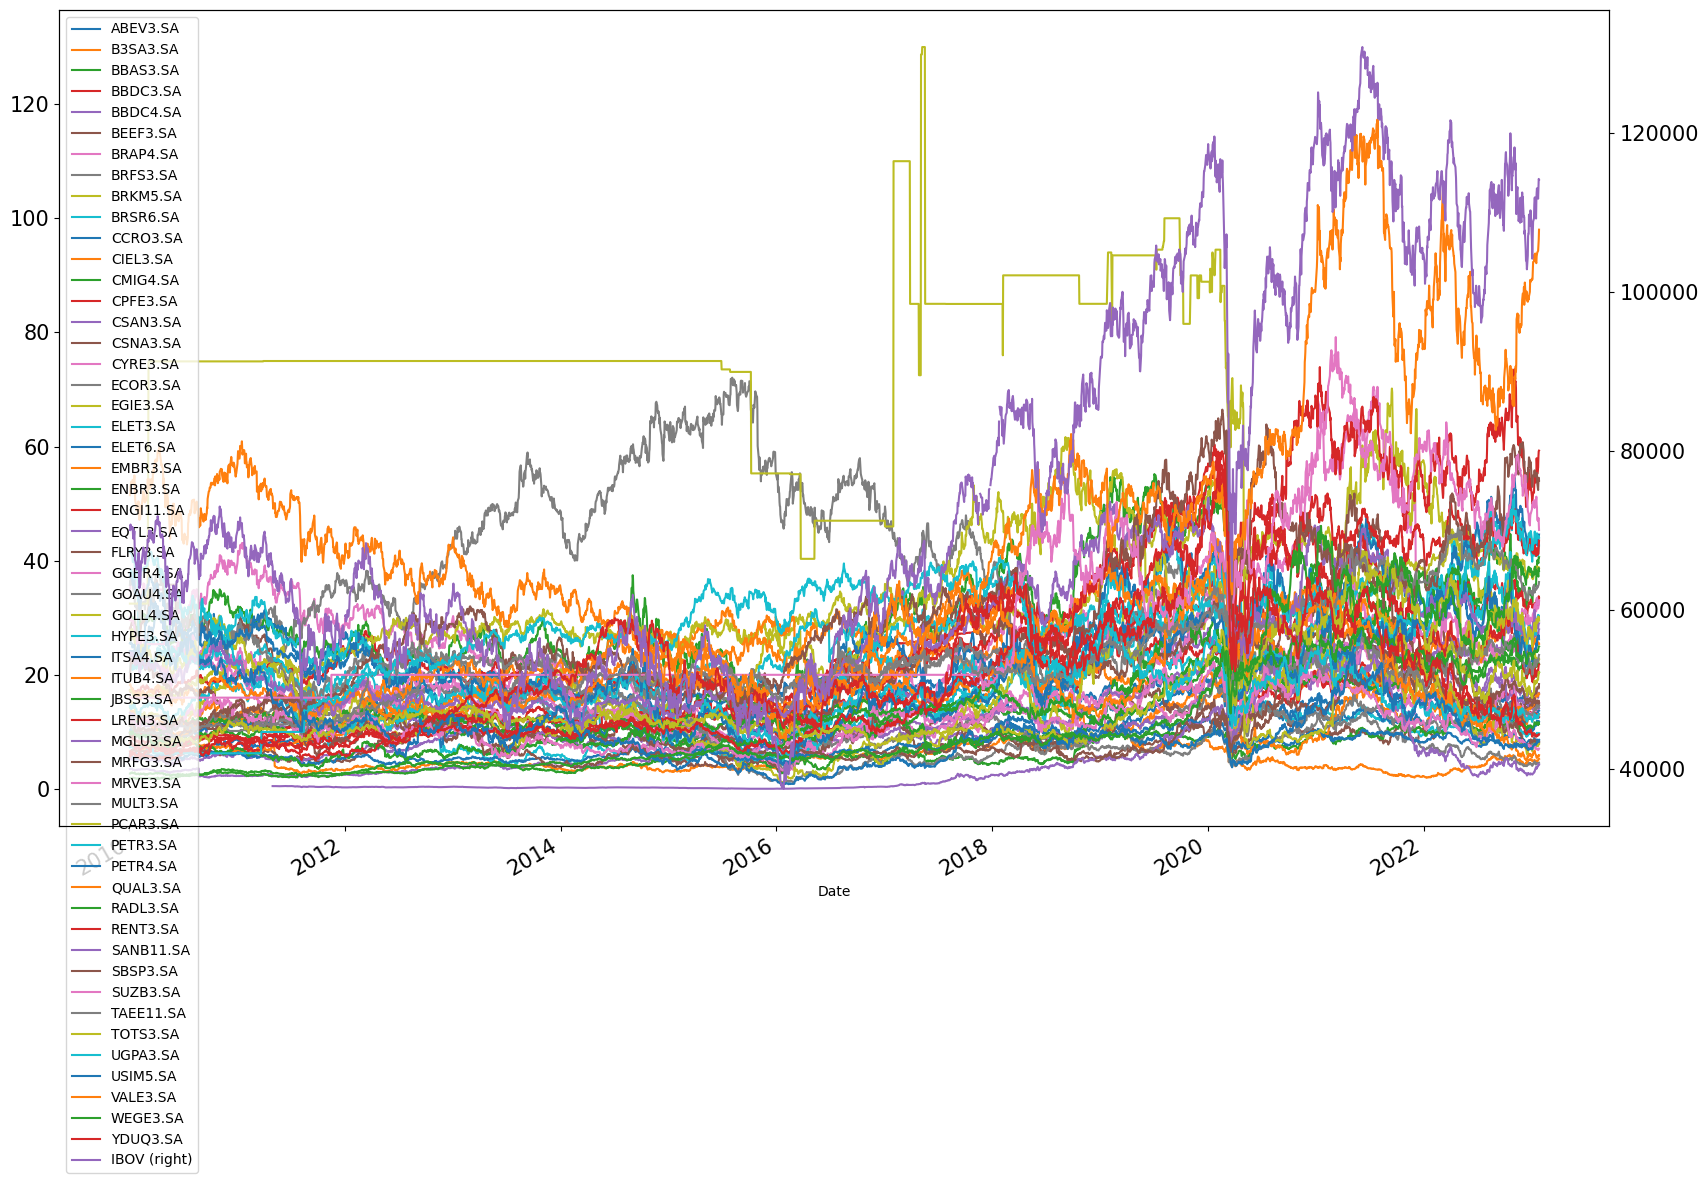

In [14]:
df.plot(figsize = (20, 12), fontsize = 15, secondary_y = "IBOV")
plt.show()

This graph shows the absolute price of the stocks which isn't that so meaningful, so we need  to look at the relative prices.

In [15]:
# Normalizing the stock prices by its initial values

df.div(df.iloc[0]).mul(100)

ABEV3.SA    B3SA3.SA    BBAS3.SA    BBDC3.SA    BBDC4.SA  \
Date                                                                     
2010-01-04  100.000000  100.000000  100.000000  100.000000  100.000000   
2010-01-05  100.588237  100.386102   98.996658   98.580654   99.469496   
2010-01-06  101.614392  104.169884   99.130434   98.000001   98.673739   
2010-01-07  102.091507  106.640931   99.163880   97.774195   98.408487   
2010-01-08  101.895426  104.169884   99.732442   97.903225   98.302387   
...                ...         ...         ...         ...         ...   
2023-01-20  221.326580   98.610044  134.013379  141.677065  109.646390   
2023-01-23  219.527183   97.683396  133.010037  137.160146  105.012392   
2023-01-24  222.635236   99.150582  132.341138  138.702513  105.909294   
2023-01-25  224.271063  101.235520  135.953184  138.922845  105.386103   
2023-01-26  224.761805  101.312742  135.886293  138.592341  105.685070   

              BEEF3.SA    BRAP4.SA    BRFS3.SA    BRKM5.SA    BRSR6.SA  ...  \
Date                                                                    ...   
2010-01-04  100.000000  100.000000  100.000000  100.000000  100.000000  ...   
2010-01-05  103.951896  102.015307  101.048263   99.087718   97.945204  ...   
2010-01-06  109.106548  103.443883  102.424111  101.473684   98.287671  ...   
2010-01-07  111.512042  104.591844  101.790783   98.947371   96.575343  ...   
2010-01-08  118.556711  106.122455  102.205718   97.543857   95.890408  ...   
...                ...         ...         ...         ...         ...  ...   
2023-01-20  271.022367   92.290525   34.505350  150.596485   66.095886  ...   
2023-01-23  261.411642   91.109166   34.024895  151.999999   64.383557  ...   
2023-01-24  257.392604   92.146458   35.029484  161.263155   65.205481  ...   
2023-01-25  259.838976   92.866803   35.553615  158.947366   65.616436  ...   
2023-01-26  257.742093   94.682074   35.815679  159.508769   67.054793  ...   

              SBSP3.SA    SUZB3.SA   TAEE11.SA    TOTS3.SA    UGPA3.SA  \
Date                                                                     
2010-01-04  100.000000  100.000000  100.000000  100.000000  100.000000   
2010-01-05  100.147282  100.000000  100.026686   98.326366  100.000000   
2010-01-06  100.117829  100.000000  100.026686   98.912137  100.000000   
2010-01-07   98.527251  100.000000  100.026686   98.995816  100.000000   
2010-01-08  100.176735  100.000000   99.813182   99.958160  100.000000   
...                ...         ...         ...         ...         ...   
2023-01-20  473.637732  294.477768  281.985603  365.966015  172.581195   
2023-01-23  462.945544  293.478269  284.547651  372.757125  170.119652   
2023-01-24  475.670162  296.789106  285.988806  380.051292  177.367525   
2023-01-25  481.944087  292.166430  286.869516  377.158783  179.965810   
2023-01-26  477.702559  283.608216  290.392323  371.248000  179.829055   

              USIM5.SA    VALE3.SA     WEGE3.SA    YDUQ3.SA        IBOV  
Date                                                                     
2010-01-04  100.000000  100.000000   100.000000  100.000000  100.000000  
2010-01-05  100.294121  100.932219    99.781782  101.197848  100.278392  
2010-01-06  100.196075  103.068553   100.327336  102.850068  100.976515  
2010-01-07  101.137258  103.495823   102.018559  101.197848  100.579627  
2010-01-08   99.705879  104.505729   105.728296  101.197848  100.311228  
...                ...         ...          ...         ...         ...  
2023-01-20   32.509804  182.540289  1376.709483  116.728630  160.326933  
2023-01-23   32.705883  183.142358  1378.184554  116.232967  159.481762  
2023-01-24   32.431374  185.084482  1372.283849  118.339536  161.364837  
2023-01-25   32.470587  186.832383  1427.971879  119.206942  163.030909  
2023-01-26   33.686275  190.328213  1409.163287  118.959117  162.908130  

[3244 rows x 55 columns]

In [16]:
normalized = df.div(df.iloc[0]).mul(100)

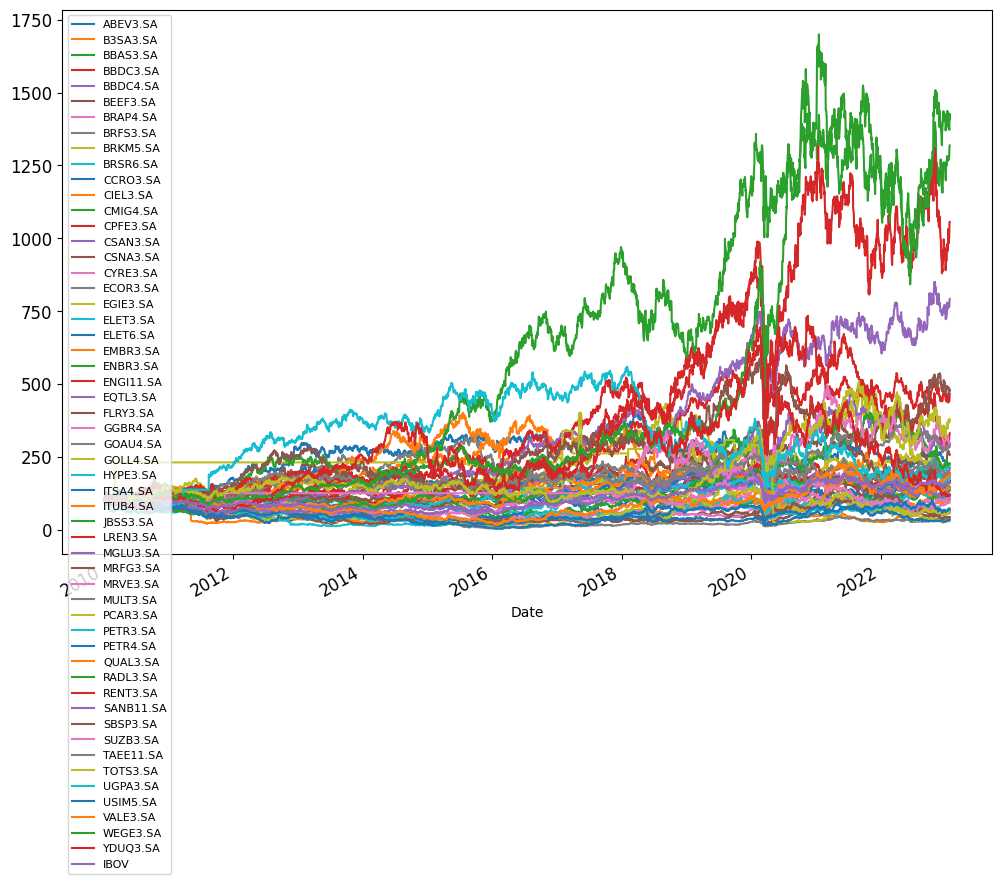

In [17]:
normalized.plot(figsize=(12,8), fontsize=12)
plt.legend(fontsize=8)
plt.show()

Now, all stocks are starting at the same place and in this way we can clearly see their performance.

In [18]:
# Now looking for daily returns

returns = df.pct_change()
returns

ABEV3.SA  B3SA3.SA  BBAS3.SA  BBDC3.SA  BBDC4.SA  BEEF3.SA  \
Date                                                                     
2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-05  0.005882  0.003861 -0.010033 -0.014193 -0.005305  0.039519   
2010-01-06  0.010202  0.037692  0.001351 -0.005890 -0.008000  0.049587   
2010-01-07  0.004695  0.023721  0.000337 -0.002304 -0.002688  0.022047   
2010-01-08 -0.001921 -0.023172  0.005734  0.001320 -0.001078  0.063174   
...              ...       ...       ...       ...       ...       ...   
2023-01-20 -0.008065 -0.015420  0.024546 -0.019069 -0.014113  0.003884   
2023-01-23 -0.008130 -0.009397 -0.007487 -0.031882 -0.042263 -0.035461   
2023-01-24  0.014158  0.015020 -0.005029  0.011245  0.008541 -0.015374   
2023-01-25  0.007348  0.021028  0.027293  0.001589 -0.004940  0.009504   
2023-01-26  0.002188  0.000763 -0.000492 -0.002379  0.002837 -0.008070   

            BRAP4.SA  BRFS3.SA  BRKM5.SA  BRSR6.SA  ...  SBSP3.SA  SUZB3.SA  \
Date                                                ...                       
2010-01-04       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2010-01-05  0.020153  0.010483 -0.009123 -0.020548  ...  0.001473  0.000000   
2010-01-06  0.014004  0.013616  0.024079  0.003497  ... -0.000294  0.000000   
2010-01-07  0.011097 -0.006183 -0.024896 -0.017422  ... -0.015887  0.000000   
2010-01-08  0.014634  0.004076 -0.014184 -0.007092  ...  0.016741  0.000000   
...              ...       ...       ...       ...  ...       ...       ...   
2023-01-20  0.003761  0.023316 -0.022324 -0.020305  ... -0.031442 -0.044589   
2023-01-23 -0.012800 -0.013924  0.009320 -0.025907  ... -0.022575 -0.003394   
2023-01-24  0.011385  0.029525  0.060942  0.012766  ...  0.027486  0.011281   
2023-01-25  0.007817  0.014963 -0.014360  0.006302  ...  0.013190 -0.015576   
2023-01-26  0.019547  0.007371  0.003532  0.021921  ... -0.008801 -0.029292   

            TAEE11.SA  TOTS3.SA  UGPA3.SA  USIM5.SA  VALE3.SA  WEGE3.SA  \
Date                                                                      
2010-01-04        NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-05   0.000267 -0.016736  0.000000  0.002941  0.009322 -0.002182   
2010-01-06   0.000000  0.005957  0.000000 -0.000978  0.021166  0.005467   
2010-01-07   0.000000  0.000846  0.000000  0.009393  0.004145  0.016857   
2010-01-08  -0.002134  0.009721  0.000000 -0.014153  0.009758  0.036363   
...               ...       ...       ...       ...       ...       ...   
2023-01-20  -0.010118 -0.018550 -0.019425  0.027261  0.002667 -0.015299   
2023-01-23   0.009086  0.018557 -0.014263  0.006031  0.003298  0.001071   
2023-01-24   0.005065  0.019568  0.042605 -0.008393  0.010604 -0.004282   
2023-01-25   0.003080 -0.007611  0.014649  0.001209  0.009444  0.040581   
2023-01-26   0.012280 -0.015672 -0.000760  0.037440  0.018711 -0.013172   

            YDUQ3.SA      IBOV  
Date                            
2010-01-04       NaN       NaN  
2010-01-05  0.011978  0.002784  
2010-01-06  0.016327  0.006962  
2010-01-07 -0.016064 -0.003930  
2010-01-08  0.000000 -0.002669  
...              ...       ...  
2023-01-20 -0.004228 -0.006239  
2023-01-23 -0.004246 -0.005272  
2023-01-24  0.018124  0.011807  
2023-01-25  0.007330  0.010325  
2023-01-26 -0.002079 -0.000753  

[3244 rows x 55 columns]

In [19]:
# Here we can see two of the most important metrics in finance 'mean' and 'risk' ('std') for each stock

returns.describe()

ABEV3.SA     B3SA3.SA     BBAS3.SA     BBDC3.SA     BBDC4.SA  \
count  3243.000000  3243.000000  3243.000000  3243.000000  3243.000000   
mean      0.000389     0.000413     0.000424     0.000325     0.000250   
std       0.016703     0.026344     0.025640     0.021156     0.021548   
min      -0.157818    -0.661336    -0.211712    -0.160127    -0.173843   
25%      -0.008418    -0.013327    -0.013236    -0.011473    -0.010995   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.009445     0.014204     0.013608     0.011542     0.011321   
max       0.112924     0.192447     0.171261     0.163276     0.168669   

          BEEF3.SA     BRAP4.SA     BRFS3.SA     BRKM5.SA     BRSR6.SA  ...  \
count  3243.000000  3243.000000  3243.000000  3243.000000  3243.000000  ...   
mean      0.000587     0.000375    -0.000038     0.000589     0.000207  ...   
std       0.024288     0.027407     0.023539     0.029961     0.025665  ...   
min      -0.185748    -0.460883    -0.197471    -0.244731    -0.201531  ...   
25%      -0.013000    -0.013321    -0.011473    -0.014245    -0.014488  ...   
50%       0.000000     0.000000    -0.000196     0.000000     0.000000  ...   
75%       0.012873     0.013755     0.011067     0.013428     0.014377  ...   
max       0.181818     0.182515     0.162781     0.317544     0.150070  ...   

          SBSP3.SA     SUZB3.SA    TAEE11.SA     TOTS3.SA     UGPA3.SA  \
count  3243.000000  3243.000000  3243.000000  3243.000000  3243.000000   
mean      0.000746     0.000473     0.000460     0.000668     0.000476   
std       0.022988     0.017528     0.016132     0.022963     0.025054   
min      -0.178300    -0.161309    -0.180328    -0.153436    -0.213580   
25%      -0.012255     0.000000    -0.006723    -0.012296    -0.008785   
50%       0.000752     0.000000     0.000000     0.000000     0.000000   
75%       0.013093     0.000000     0.007729     0.013426     0.009224   
max       0.174603     0.250000     0.127091     0.197996     0.597444   

          USIM5.SA     VALE3.SA     WEGE3.SA     YDUQ3.SA         IBOV  
count  3243.000000  3243.000000  3243.000000  3243.000000  3243.000000  
mean      0.000279     0.000542     0.001020     0.000505     0.000271  
std       0.035291     0.026211     0.020153     0.030086     0.015457  
min      -0.212329    -0.245592    -0.206197    -0.251744    -0.147797  
25%      -0.019012    -0.013822    -0.010168    -0.015552    -0.008155  
50%      -0.001202     0.000000     0.000122     0.000000     0.000288  
75%       0.017449     0.013569     0.011631     0.016179     0.008935  
max       0.351064     0.213579     0.138944     0.237365     0.139082  

[8 rows x 55 columns]

In [20]:
# Evaluating the risk and return 

def rnr(returns):
    summary = returns.agg(['mean', 'std']).T
    summary['Return'] = summary['mean'] * 252 #We have, approximately, 252 trading days in a year
    summary['Risk'] = summary['std'] * np.sqrt(252)
    summary.drop(columns=['mean', 'std'], inplace=True)
    return summary

In [21]:
# Using the functions to evaluate the return and risk for each stock

rnr(returns)

Return      Risk
ABEV3.SA   0.098141  0.265151
B3SA3.SA   0.104085  0.418200
BBAS3.SA   0.106937  0.407016
BBDC3.SA   0.081796  0.335838
BBDC4.SA   0.062924  0.342065
BEEF3.SA   0.147814  0.385554
BRAP4.SA   0.094445  0.435078
BRFS3.SA  -0.009636  0.373665
BRKM5.SA   0.148328  0.475619
BRSR6.SA   0.052160  0.407417
CCRO3.SA   0.081011  0.369438
CIEL3.SA   0.048721  0.402479
CMIG4.SA   0.092529  0.402615
CPFE3.SA   0.091460  0.281056
CSAN3.SA   0.146425  0.351268
CSNA3.SA   0.123967  0.560395
CYRE3.SA   0.059391  0.437088
ECOR3.SA   0.023965  0.403249
EGIE3.SA   0.092641  0.244363
ELET3.SA   0.140924  0.516751
ELET6.SA   0.154035  0.462899
EMBR3.SA   0.125706  0.411965
ENBR3.SA   0.090710  0.294181
ENGI11.SA  0.171421  0.321747
EQTL3.SA   0.206776  0.295169
FLRY3.SA   0.091734  0.322103
GGBR4.SA   0.103799  0.436956
GOAU4.SA   0.040545  0.468570
GOLL4.SA   0.136270  0.682962
HYPE3.SA   0.118954  0.345009
ITSA4.SA   0.075774  0.304117
ITUB4.SA   0.076384  0.317699
JBSS3.SA   0.172785  0.467433
LREN3.SA   0.162469  0.372628
MGLU3.SA   0.371653  0.620203
MRFG3.SA   0.045085  0.470005
MRVE3.SA   0.060408  0.456937
MULT3.SA   0.116403  0.343355
PCAR3.SA   0.223915  0.760552
PETR3.SA   0.083873  0.467511
PETR4.SA   0.082309  0.465248
QUAL3.SA   0.022594  0.455964
RADL3.SA   0.253822  0.326878
RENT3.SA   0.260374  0.393207
SANB11.SA  0.077980  0.353414
SBSP3.SA   0.188066  0.364920
SUZB3.SA   0.119105  0.278248
TAEE11.SA  0.115929  0.256083
TOTS3.SA   0.168410  0.364521
UGPA3.SA   0.119940  0.397718
USIM5.SA   0.070298  0.560230
VALE3.SA   0.136616  0.416081
WEGE3.SA   0.256933  0.319917
YDUQ3.SA   0.127290  0.477603
IBOV       0.068214  0.245375

In [22]:
summary = rnr(returns)

In [23]:
info.head()

Código             Ação  \
0  ABEV3.SA        AMBEV S/A   
1  AZUL4.SA             AZUL   
2  B3SA3.SA               B3   
3  BBAS3.SA  BANCO DO BRASIL   
4  BBDC3.SA         BRADESCO   

                                               Setor  
0  Consumo não Cíclico / Bebidas / Cervejas e Ref...  
1   Bens Industriais / Transporte / Transporte Aéreo  
2  Financeiro e Outros / Serviços Financeiros Div...  
3  Financeiro e Outros / Intermediários Financeir...  
4  Financeiro e Outros / Intermediários Financeir...

In [24]:
# Let's clear the name for each 'Código'

summary = summary.merge(info.loc[:, ['Código', 'Ação']], how='left', left_index=True, right_on='Código')
summary

Return      Risk     Código             Ação
0.0   0.098141  0.265151   ABEV3.SA        AMBEV S/A
2.0   0.104085  0.418200   B3SA3.SA               B3
3.0   0.106937  0.407016   BBAS3.SA  BANCO DO BRASIL
4.0   0.081796  0.335838   BBDC3.SA         BRADESCO
5.0   0.062924  0.342065   BBDC4.SA         BRADESCO
7.0   0.147814  0.385554   BEEF3.SA          MINERVA
9.0   0.094445  0.435078   BRAP4.SA        BRADESPAR
11.0 -0.009636  0.373665   BRFS3.SA           BRF SA
12.0  0.148328  0.475619   BRKM5.SA          BRASKEM
14.0  0.052160  0.407417   BRSR6.SA         BANRISUL
16.0  0.081011  0.369438   CCRO3.SA           CCR SA
17.0  0.048721  0.402479   CIEL3.SA            CIELO
18.0  0.092529  0.402615   CMIG4.SA            CEMIG
20.0  0.091460  0.281056   CPFE3.SA     CPFL ENERGIA
22.0  0.146425  0.351268   CSAN3.SA            COSAN
23.0  0.123967  0.560395   CSNA3.SA     SID NACIONAL
25.0  0.059391  0.437088   CYRE3.SA     CYRELA REALT
26.0  0.023965  0.403249   ECOR3.SA      ECORODOVIAS
27.0  0.092641  0.244363   EGIE3.SA     ENGIE BRASIL
28.0  0.140924  0.516751   ELET3.SA       ELETROBRAS
29.0  0.154035  0.462899   ELET6.SA       ELETROBRAS
30.0  0.125706  0.411965   EMBR3.SA          EMBRAER
31.0  0.090710  0.294181   ENBR3.SA      ENERGIAS BR
32.0  0.171421  0.321747  ENGI11.SA         ENERGISA
33.0  0.206776  0.295169   EQTL3.SA       EQUATORIAL
34.0  0.091734  0.322103   FLRY3.SA           FLEURY
35.0  0.103799  0.436956   GGBR4.SA           GERDAU
37.0  0.040545  0.468570   GOAU4.SA       GERDAU MET
38.0  0.136270  0.682962   GOLL4.SA              GOL
41.0  0.118954  0.345009   HYPE3.SA           HYPERA
44.0  0.075774  0.304117   ITSA4.SA           ITAUSA
45.0  0.076384  0.317699   ITUB4.SA     ITAUUNIBANCO
46.0  0.172785  0.467433   JBSS3.SA              JBS
49.0  0.162469  0.372628   LREN3.SA     LOJAS RENNER
50.0  0.371653  0.620203   MGLU3.SA      MAGAZ LUIZA
51.0  0.045085  0.470005   MRFG3.SA          MARFRIG
52.0  0.060408  0.456937   MRVE3.SA              MRV
53.0  0.116403  0.343355   MULT3.SA        MULTIPLAN
55.0  0.223915  0.760552   PCAR3.SA     P.ACUCAR-CBD
56.0  0.083873  0.467511   PETR3.SA        PETROBRAS
57.0  0.082309  0.465248   PETR4.SA        PETROBRAS
58.0  0.022594  0.455964   QUAL3.SA        QUALICORP
59.0  0.253822  0.326878   RADL3.SA     RAIADROGASIL
61.0  0.260374  0.393207   RENT3.SA         LOCALIZA
62.0  0.077980  0.353414  SANB11.SA     SANTANDER BR
63.0  0.188066  0.364920   SBSP3.SA           SABESP
65.0  0.119105  0.278248   SUZB3.SA      SUZANO S.A.
66.0  0.115929  0.256083  TAEE11.SA            TAESA
68.0  0.168410  0.364521   TOTS3.SA            TOTVS
69.0  0.119940  0.397718   UGPA3.SA         ULTRAPAR
70.0  0.070298  0.560230   USIM5.SA         USIMINAS
71.0  0.136616  0.416081   VALE3.SA             VALE
74.0  0.256933  0.319917   WEGE3.SA              WEG
75.0  0.127290  0.477603   YDUQ3.SA       YDUQS PART
NaN   0.068214  0.245375       IBOV              NaN

In [26]:
summary.rename(columns={'Ação': 'Empresa'}, inplace=True)
summary

Return      Risk     Código          Empresa
0.0   0.098141  0.265151   ABEV3.SA        AMBEV S/A
2.0   0.104085  0.418200   B3SA3.SA               B3
3.0   0.106937  0.407016   BBAS3.SA  BANCO DO BRASIL
4.0   0.081796  0.335838   BBDC3.SA         BRADESCO
5.0   0.062924  0.342065   BBDC4.SA         BRADESCO
7.0   0.147814  0.385554   BEEF3.SA          MINERVA
9.0   0.094445  0.435078   BRAP4.SA        BRADESPAR
11.0 -0.009636  0.373665   BRFS3.SA           BRF SA
12.0  0.148328  0.475619   BRKM5.SA          BRASKEM
14.0  0.052160  0.407417   BRSR6.SA         BANRISUL
16.0  0.081011  0.369438   CCRO3.SA           CCR SA
17.0  0.048721  0.402479   CIEL3.SA            CIELO
18.0  0.092529  0.402615   CMIG4.SA            CEMIG
20.0  0.091460  0.281056   CPFE3.SA     CPFL ENERGIA
22.0  0.146425  0.351268   CSAN3.SA            COSAN
23.0  0.123967  0.560395   CSNA3.SA     SID NACIONAL
25.0  0.059391  0.437088   CYRE3.SA     CYRELA REALT
26.0  0.023965  0.403249   ECOR3.SA      ECORODOVIAS
27.0  0.092641  0.244363   EGIE3.SA     ENGIE BRASIL
28.0  0.140924  0.516751   ELET3.SA       ELETROBRAS
29.0  0.154035  0.462899   ELET6.SA       ELETROBRAS
30.0  0.125706  0.411965   EMBR3.SA          EMBRAER
31.0  0.090710  0.294181   ENBR3.SA      ENERGIAS BR
32.0  0.171421  0.321747  ENGI11.SA         ENERGISA
33.0  0.206776  0.295169   EQTL3.SA       EQUATORIAL
34.0  0.091734  0.322103   FLRY3.SA           FLEURY
35.0  0.103799  0.436956   GGBR4.SA           GERDAU
37.0  0.040545  0.468570   GOAU4.SA       GERDAU MET
38.0  0.136270  0.682962   GOLL4.SA              GOL
41.0  0.118954  0.345009   HYPE3.SA           HYPERA
44.0  0.075774  0.304117   ITSA4.SA           ITAUSA
45.0  0.076384  0.317699   ITUB4.SA     ITAUUNIBANCO
46.0  0.172785  0.467433   JBSS3.SA              JBS
49.0  0.162469  0.372628   LREN3.SA     LOJAS RENNER
50.0  0.371653  0.620203   MGLU3.SA      MAGAZ LUIZA
51.0  0.045085  0.470005   MRFG3.SA          MARFRIG
52.0  0.060408  0.456937   MRVE3.SA              MRV
53.0  0.116403  0.343355   MULT3.SA        MULTIPLAN
55.0  0.223915  0.760552   PCAR3.SA     P.ACUCAR-CBD
56.0  0.083873  0.467511   PETR3.SA        PETROBRAS
57.0  0.082309  0.465248   PETR4.SA        PETROBRAS
58.0  0.022594  0.455964   QUAL3.SA        QUALICORP
59.0  0.253822  0.326878   RADL3.SA     RAIADROGASIL
61.0  0.260374  0.393207   RENT3.SA         LOCALIZA
62.0  0.077980  0.353414  SANB11.SA     SANTANDER BR
63.0  0.188066  0.364920   SBSP3.SA           SABESP
65.0  0.119105  0.278248   SUZB3.SA      SUZANO S.A.
66.0  0.115929  0.256083  TAEE11.SA            TAESA
68.0  0.168410  0.364521   TOTS3.SA            TOTVS
69.0  0.119940  0.397718   UGPA3.SA         ULTRAPAR
70.0  0.070298  0.560230   USIM5.SA         USIMINAS
71.0  0.136616  0.416081   VALE3.SA             VALE
74.0  0.256933  0.319917   WEGE3.SA              WEG
75.0  0.127290  0.477603   YDUQ3.SA       YDUQS PART
NaN   0.068214  0.245375       IBOV              NaN

In [28]:
summary.set_index('Empresa', inplace=True)
summary

Return      Risk     Código
Empresa                                       
AMBEV S/A        0.098141  0.265151   ABEV3.SA
B3               0.104085  0.418200   B3SA3.SA
BANCO DO BRASIL  0.106937  0.407016   BBAS3.SA
BRADESCO         0.081796  0.335838   BBDC3.SA
BRADESCO         0.062924  0.342065   BBDC4.SA
MINERVA          0.147814  0.385554   BEEF3.SA
BRADESPAR        0.094445  0.435078   BRAP4.SA
BRF SA          -0.009636  0.373665   BRFS3.SA
BRASKEM          0.148328  0.475619   BRKM5.SA
BANRISUL         0.052160  0.407417   BRSR6.SA
CCR SA           0.081011  0.369438   CCRO3.SA
CIELO            0.048721  0.402479   CIEL3.SA
CEMIG            0.092529  0.402615   CMIG4.SA
CPFL ENERGIA     0.091460  0.281056   CPFE3.SA
COSAN            0.146425  0.351268   CSAN3.SA
SID NACIONAL     0.123967  0.560395   CSNA3.SA
CYRELA REALT     0.059391  0.437088   CYRE3.SA
ECORODOVIAS      0.023965  0.403249   ECOR3.SA
ENGIE BRASIL     0.092641  0.244363   EGIE3.SA
ELETROBRAS       0.140924  0.516751   ELET3.SA
ELETROBRAS       0.154035  0.462899   ELET6.SA
EMBRAER          0.125706  0.411965   EMBR3.SA
ENERGIAS BR      0.090710  0.294181   ENBR3.SA
ENERGISA         0.171421  0.321747  ENGI11.SA
EQUATORIAL       0.206776  0.295169   EQTL3.SA
FLEURY           0.091734  0.322103   FLRY3.SA
GERDAU           0.103799  0.436956   GGBR4.SA
GERDAU MET       0.040545  0.468570   GOAU4.SA
GOL              0.136270  0.682962   GOLL4.SA
HYPERA           0.118954  0.345009   HYPE3.SA
ITAUSA           0.075774  0.304117   ITSA4.SA
ITAUUNIBANCO     0.076384  0.317699   ITUB4.SA
JBS              0.172785  0.467433   JBSS3.SA
LOJAS RENNER     0.162469  0.372628   LREN3.SA
MAGAZ LUIZA      0.371653  0.620203   MGLU3.SA
MARFRIG          0.045085  0.470005   MRFG3.SA
MRV              0.060408  0.456937   MRVE3.SA
MULTIPLAN        0.116403  0.343355   MULT3.SA
P.ACUCAR-CBD     0.223915  0.760552   PCAR3.SA
PETROBRAS        0.083873  0.467511   PETR3.SA
PETROBRAS        0.082309  0.465248   PETR4.SA
QUALICORP        0.022594  0.455964   QUAL3.SA
RAIADROGASIL     0.253822  0.326878   RADL3.SA
LOCALIZA         0.260374  0.393207   RENT3.SA
SANTANDER BR     0.077980  0.353414  SANB11.SA
SABESP           0.188066  0.364920   SBSP3.SA
SUZANO S.A.      0.119105  0.278248   SUZB3.SA
TAESA            0.115929  0.256083  TAEE11.SA
TOTVS            0.168410  0.364521   TOTS3.SA
ULTRAPAR         0.119940  0.397718   UGPA3.SA
USIMINAS         0.070298  0.560230   USIM5.SA
VALE             0.136616  0.416081   VALE3.SA
WEG              0.256933  0.319917   WEGE3.SA
YDUQS PART       0.127290  0.477603   YDUQ3.SA
NaN              0.068214  0.245375       IBOV

In [29]:
summary.rename(index= {np.nan: 'IBOVESPA'}, inplace=True)

In [30]:
summary

Return      Risk     Código
Empresa                                       
AMBEV S/A        0.098141  0.265151   ABEV3.SA
B3               0.104085  0.418200   B3SA3.SA
BANCO DO BRASIL  0.106937  0.407016   BBAS3.SA
BRADESCO         0.081796  0.335838   BBDC3.SA
BRADESCO         0.062924  0.342065   BBDC4.SA
MINERVA          0.147814  0.385554   BEEF3.SA
BRADESPAR        0.094445  0.435078   BRAP4.SA
BRF SA          -0.009636  0.373665   BRFS3.SA
BRASKEM          0.148328  0.475619   BRKM5.SA
BANRISUL         0.052160  0.407417   BRSR6.SA
CCR SA           0.081011  0.369438   CCRO3.SA
CIELO            0.048721  0.402479   CIEL3.SA
CEMIG            0.092529  0.402615   CMIG4.SA
CPFL ENERGIA     0.091460  0.281056   CPFE3.SA
COSAN            0.146425  0.351268   CSAN3.SA
SID NACIONAL     0.123967  0.560395   CSNA3.SA
CYRELA REALT     0.059391  0.437088   CYRE3.SA
ECORODOVIAS      0.023965  0.403249   ECOR3.SA
ENGIE BRASIL     0.092641  0.244363   EGIE3.SA
ELETROBRAS       0.140924  0.516751   ELET3.SA
ELETROBRAS       0.154035  0.462899   ELET6.SA
EMBRAER          0.125706  0.411965   EMBR3.SA
ENERGIAS BR      0.090710  0.294181   ENBR3.SA
ENERGISA         0.171421  0.321747  ENGI11.SA
EQUATORIAL       0.206776  0.295169   EQTL3.SA
FLEURY           0.091734  0.322103   FLRY3.SA
GERDAU           0.103799  0.436956   GGBR4.SA
GERDAU MET       0.040545  0.468570   GOAU4.SA
GOL              0.136270  0.682962   GOLL4.SA
HYPERA           0.118954  0.345009   HYPE3.SA
ITAUSA           0.075774  0.304117   ITSA4.SA
ITAUUNIBANCO     0.076384  0.317699   ITUB4.SA
JBS              0.172785  0.467433   JBSS3.SA
LOJAS RENNER     0.162469  0.372628   LREN3.SA
MAGAZ LUIZA      0.371653  0.620203   MGLU3.SA
MARFRIG          0.045085  0.470005   MRFG3.SA
MRV              0.060408  0.456937   MRVE3.SA
MULTIPLAN        0.116403  0.343355   MULT3.SA
P.ACUCAR-CBD     0.223915  0.760552   PCAR3.SA
PETROBRAS        0.083873  0.467511   PETR3.SA
PETROBRAS        0.082309  0.465248   PETR4.SA
QUALICORP        0.022594  0.455964   QUAL3.SA
RAIADROGASIL     0.253822  0.326878   RADL3.SA
LOCALIZA         0.260374  0.393207   RENT3.SA
SANTANDER BR     0.077980  0.353414  SANB11.SA
SABESP           0.188066  0.364920   SBSP3.SA
SUZANO S.A.      0.119105  0.278248   SUZB3.SA
TAESA            0.115929  0.256083  TAEE11.SA
TOTVS            0.168410  0.364521   TOTS3.SA
ULTRAPAR         0.119940  0.397718   UGPA3.SA
USIMINAS         0.070298  0.560230   USIM5.SA
VALE             0.136616  0.416081   VALE3.SA
WEG              0.256933  0.319917   WEGE3.SA
YDUQS PART       0.127290  0.477603   YDUQ3.SA
IBOVESPA         0.068214  0.245375       IBOV

## **Choosing our portfolio**

In [31]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3244 entries, 2010-01-04 to 2023-01-26
Data columns (total 55 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   3243 non-null   float64
 1   B3SA3.SA   3243 non-null   float64
 2   BBAS3.SA   3243 non-null   float64
 3   BBDC3.SA   3243 non-null   float64
 4   BBDC4.SA   3243 non-null   float64
 5   BEEF3.SA   3243 non-null   float64
 6   BRAP4.SA   3243 non-null   float64
 7   BRFS3.SA   3243 non-null   float64
 8   BRKM5.SA   3243 non-null   float64
 9   BRSR6.SA   3243 non-null   float64
 10  CCRO3.SA   3243 non-null   float64
 11  CIEL3.SA   3243 non-null   float64
 12  CMIG4.SA   3243 non-null   float64
 13  CPFE3.SA   3243 non-null   float64
 14  CSAN3.SA   3243 non-null   float64
 15  CSNA3.SA   3243 non-null   float64
 16  CYRE3.SA   3243 non-null   float64
 17  ECOR3.SA   3183 non-null   float64
 18  EGIE3.SA   3243 non-null   float64
 19  ELET3.SA   3243 non-null   flo

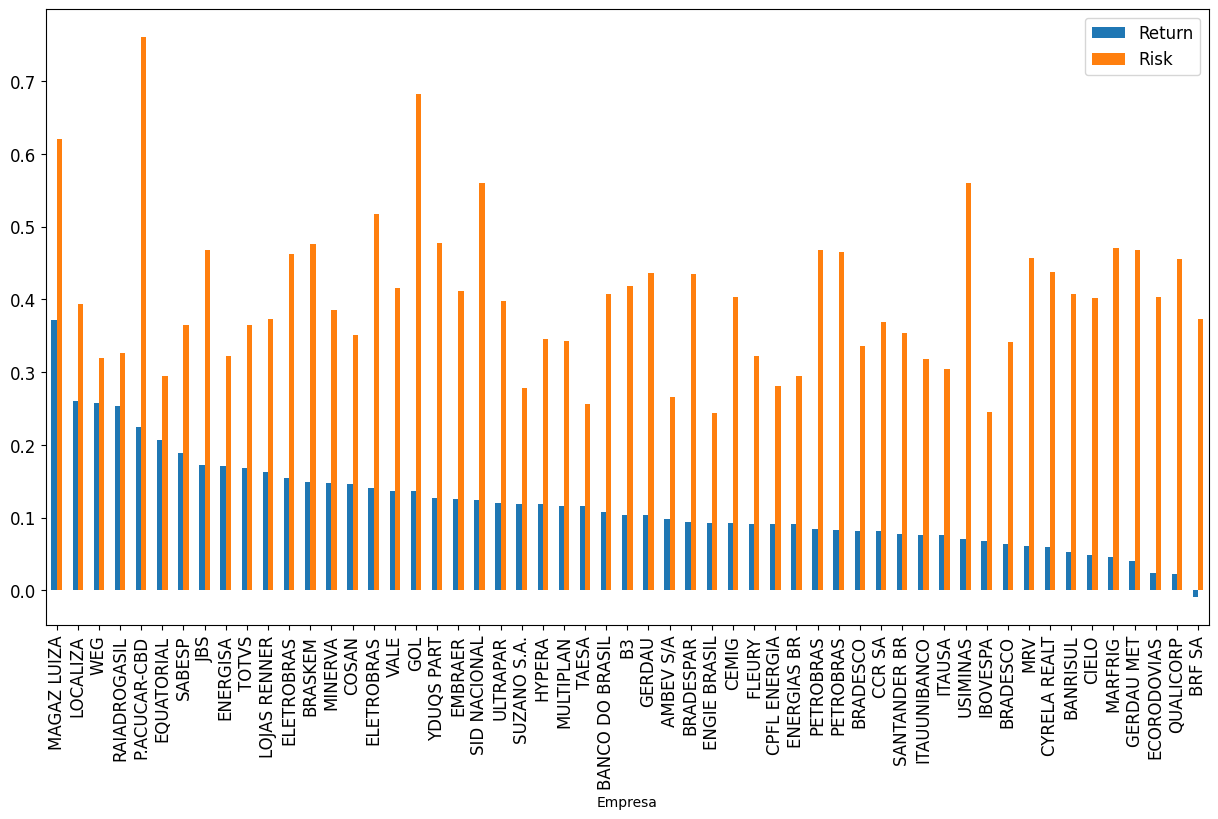

In [33]:
# Evaluating risk and returns of each stock

summary.sort_values(by='Return',ascending=False).plot(kind='bar', figsize=(15,8), fontsize=12)
plt.legend(fontsize=12)
plt.show()

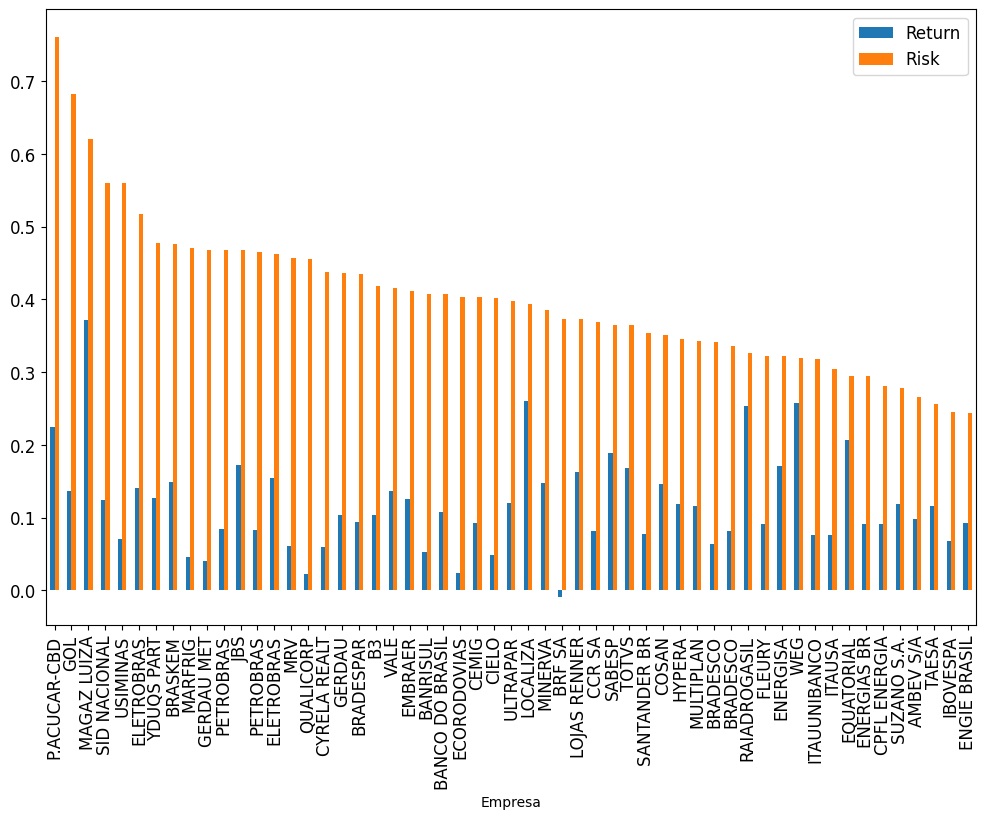

In [34]:
summary.sort_values(by='Risk',ascending=False).plot(kind='bar', figsize=(12,8), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [35]:
summary.set_index('Código', inplace=True)

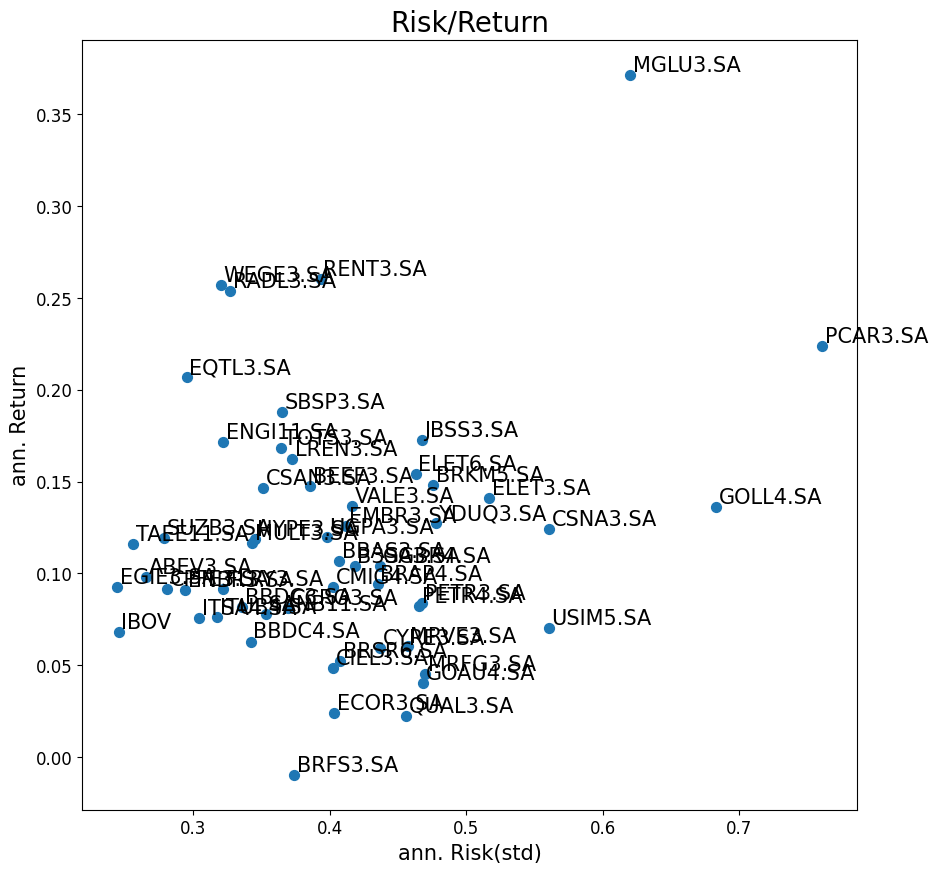

In [40]:
summary.plot(kind='scatter', x= 'Risk', y='Return', s=50, figsize=(10,10), fontsize=12)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [41]:
# Searching for which stocks are 'working' together

corr_matrix = returns.corr()
corr_matrix

ABEV3.SA  B3SA3.SA  BBAS3.SA  BBDC3.SA  BBDC4.SA  BEEF3.SA  \
ABEV3.SA   1.000000  0.300087  0.366598  0.439521  0.418117  0.193752   
B3SA3.SA   0.300087  1.000000  0.498681  0.513237  0.503210  0.198184   
BBAS3.SA   0.366598  0.498681  1.000000  0.728529  0.732829  0.188198   
BBDC3.SA   0.439521  0.513237  0.728529  1.000000  0.886658  0.182026   
BBDC4.SA   0.418117  0.503210  0.732829  0.886658  1.000000  0.185605   
BEEF3.SA   0.193752  0.198184  0.188198  0.182026  0.185605  1.000000   
BRAP4.SA   0.227249  0.280487  0.350615  0.357601  0.372442  0.196588   
BRFS3.SA   0.346119  0.285384  0.323730  0.354078  0.350097  0.323726   
BRKM5.SA   0.280682  0.282640  0.322492  0.361884  0.354099  0.196505   
BRSR6.SA   0.310831  0.386803  0.572495  0.541775  0.545072  0.187902   
CCRO3.SA   0.356521  0.447413  0.514258  0.505917  0.491503  0.227047   
CIEL3.SA   0.314377  0.332680  0.362317  0.371984  0.375318  0.153230   
CMIG4.SA   0.329090  0.381156  0.518039  0.486870  0.488180  0.186477   
CPFE3.SA   0.328842  0.372161  0.421880  0.427211  0.421434  0.187518   
CSAN3.SA   0.346839  0.402434  0.462528  0.479387  0.474852  0.226099   
CSNA3.SA   0.262728  0.336132  0.426576  0.432043  0.444473  0.212690   
CYRE3.SA   0.359146  0.513775  0.535676  0.526616  0.534502  0.210631   
ECOR3.SA   0.350965  0.431874  0.492017  0.486660  0.488339  0.216973   
EGIE3.SA   0.318475  0.359683  0.432547  0.445158  0.426953  0.141016   
ELET3.SA   0.277016  0.380753  0.470156  0.455894  0.442648  0.169052   
ELET6.SA   0.281923  0.361822  0.464113  0.430853  0.423129  0.172247   
EMBR3.SA   0.286692  0.224791  0.256951  0.330163  0.336507  0.190244   
ENBR3.SA   0.288729  0.351045  0.409731  0.408491  0.400627  0.193347   
ENGI11.SA  0.223522  0.236557  0.269329  0.274146  0.275773  0.143132   
EQTL3.SA   0.280207  0.323818  0.345408  0.360588  0.345179  0.148669   
FLRY3.SA   0.255211  0.304198  0.312863  0.308296  0.296130  0.170051   
GGBR4.SA   0.286102  0.339433  0.431964  0.433708  0.447874  0.234514   
GOAU4.SA   0.285990  0.357927  0.454600  0.438032  0.448295  0.233186   
GOLL4.SA   0.324783  0.386286  0.469635  0.459126  0.467681  0.179722   
HYPE3.SA   0.301059  0.429514  0.384450  0.396461  0.376261  0.219708   
ITSA4.SA   0.429234  0.518854  0.732061  0.794216  0.800920  0.198112   
ITUB4.SA   0.430584  0.510052  0.728840  0.808464  0.818500  0.181303   
JBSS3.SA   0.239327  0.265487  0.309512  0.307573  0.291969  0.325070   
LREN3.SA   0.381618  0.443104  0.494403  0.516213  0.504095  0.203995   
MGLU3.SA   0.221093  0.326974  0.331377  0.315179  0.310128  0.182996   
MRFG3.SA   0.231772  0.275191  0.301328  0.281756  0.284820  0.429594   
MRVE3.SA   0.315259  0.427461  0.442668  0.436550  0.417192  0.191701   
MULT3.SA   0.371968  0.473037  0.496782  0.522003  0.517522  0.187916   
PCAR3.SA   0.047510  0.049940  0.054704  0.053072  0.055338  0.045449   
PETR3.SA   0.323007  0.414751  0.579406  0.551311  0.561303  0.231972   
PETR4.SA   0.312783  0.425683  0.599433  0.544212  0.556837  0.219020   
QUAL3.SA   0.254446  0.387033  0.365356  0.369952  0.361571  0.141078   
RADL3.SA   0.298418  0.290850  0.271066  0.294466  0.278100  0.146074   
RENT3.SA   0.341565  0.442196  0.476543  0.485475  0.467612  0.203097   
SANB11.SA  0.390192  0.427880  0.614964  0.670021  0.668277  0.200484   
SBSP3.SA   0.346237  0.381498  0.460631  0.449253  0.442654  0.195530   
SUZB3.SA   0.079630  0.034783  0.001123  0.026334  0.027385  0.158735   
TAEE11.SA  0.178384  0.230486  0.274364  0.275471  0.255338  0.104238   
TOTS3.SA   0.275344  0.330919  0.292988  0.286541  0.262878  0.182432   
UGPA3.SA   0.344516  0.370068  0.414032  0.438092  0.432574  0.195011   
USIM5.SA   0.239633  0.339993  0.437812  0.410825  0.410819  0.207224   
VALE3.SA   0.228415  0.284078  0.355677  0.364213  0.369654  0.212309   
WEGE3.SA   0.322029  0.335331  0.296791  0.341921  0.317661  0.216263   
YDUQ3.SA   0.284972  0.322573  0.370743  0.373471  0.371105  0.126074

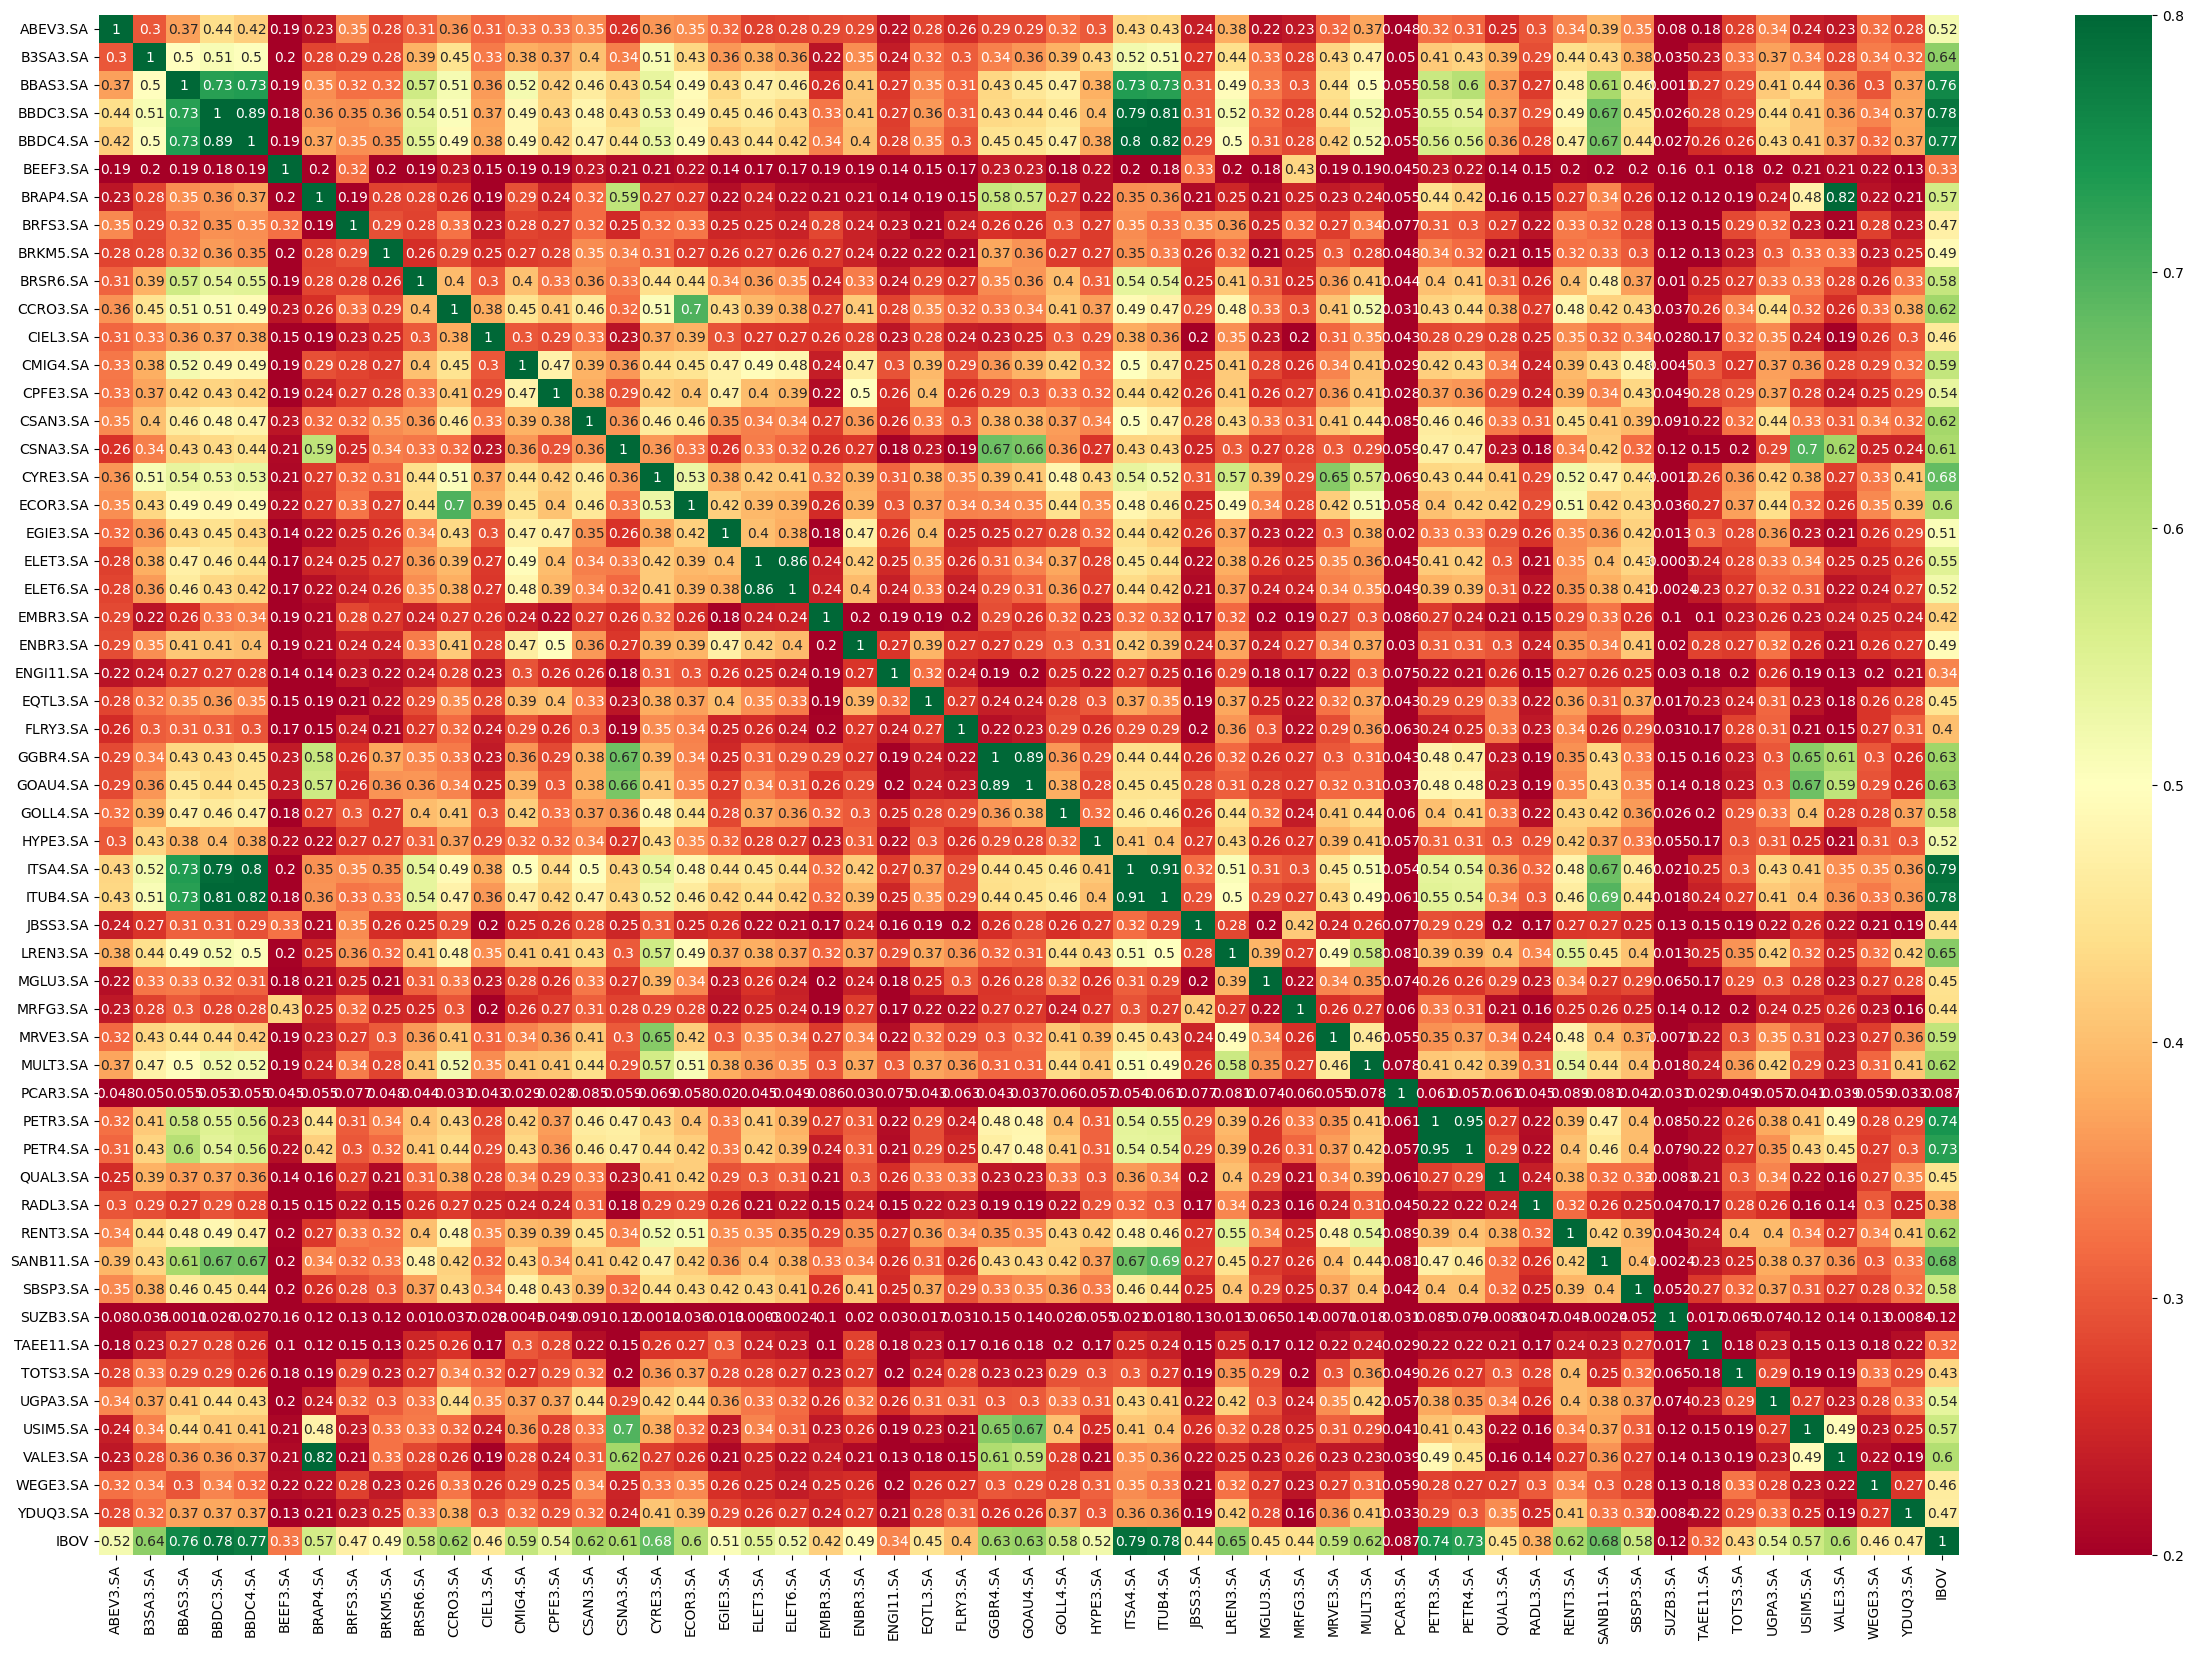

In [46]:
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, cmap='RdYlGn', annot=True, vmin=0.2, vmax=0.8)
plt.show()

When assets in a portfolio are not perfectly correlated, the overall portfolio risk is reduced. By investing in a mix of assets with different return patterns, the portfolio's returns may be less volatile than those of any individual holding. Additionally, holding a broad range of assets can help to reduce the impact of any specific market or economic downturn. This is the main reason why diversification is often considered as a key principle of modern portfolio theory.

## **Index Tracking**

Plan: Track the DJI with only __10 Stocks__ (Tracking Portfolio).

Criteria to select Tracking Portfolio: Those 10 Stocks with the __lowest individual Tracking Error__ (TE) in the Training/Fitting Period.

Training/Fitting Period: 2017 & 2018
(Forward) Testing Period: 2019

Once we have identified the 10 Tracking Stocks we need to find their __optimal weights__ in the Tracking Portfolio that __minimize TE__.

In [47]:
df.head()

ABEV3.SA  B3SA3.SA   BBAS3.SA  BBDC3.SA   BBDC4.SA  BEEF3.SA  \
Date                                                                       
2010-01-04  6.113138     12.95  29.900000  9.076981  13.379374  5.722775   
2010-01-05  6.149098     13.00  29.600000  8.948147  13.308395  5.948933   
2010-01-06  6.211828     13.49  29.639999  8.895441  13.201928  6.243922   
2010-01-07  6.240995     13.81  29.650000  8.874945  13.166439  6.381583   
2010-01-08  6.229008     13.49  29.820000  8.886657  13.152244  6.784734   

             BRAP4.SA   BRFS3.SA  BRKM5.SA  BRSR6.SA  ...   SBSP3.SA  \
Date                                                  ...              
2010-01-04  34.705620  22.895000     14.25     14.60  ...  11.316666   
2010-01-05  35.405045  23.135000     14.12     14.30  ...  11.333333   
2010-01-06  35.900841  23.450001     14.46     14.35  ...  11.330000   
2010-01-07  36.299248  23.305000     14.10     14.10  ...  11.150000   
2010-01-08  36.830456  23.400000     13.90     14.00  ...  11.336666   

             SUZB3.SA  TAEE11.SA  TOTS3.SA  UGPA3.SA   USIM5.SA   VALE3.SA  \
Date                                                                         
2010-01-04  16.007999  12.490000  7.951558    7.3125  25.500000  51.490002   
2010-01-05  16.007999  12.493333  7.818478    7.3125  25.575001  51.970001   
2010-01-06  16.007999  12.493333  7.865056    7.3125  25.549999  53.070000   
2010-01-07  16.007999  12.493333  7.871710    7.3125  25.790001  53.290001   
2010-01-08  16.007999  12.466666  7.948231    7.3125  25.424999  53.810001   

            WEGE3.SA  YDUQ3.SA     IBOV  
Date                                     
2010-01-04  2.711538  8.070000  70045.0  
2010-01-05  2.705621  8.166666  70240.0  
2010-01-06  2.720414  8.300000  70729.0  
2010-01-07  2.766272  8.166666  70451.0  
2010-01-08  2.866863  8.166666  70263.0  

[5 rows x 55 columns]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3244 entries, 2010-01-04 to 2023-01-26
Data columns (total 55 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   3244 non-null   float64
 1   B3SA3.SA   3242 non-null   float64
 2   BBAS3.SA   3244 non-null   float64
 3   BBDC3.SA   3244 non-null   float64
 4   BBDC4.SA   3244 non-null   float64
 5   BEEF3.SA   3244 non-null   float64
 6   BRAP4.SA   3244 non-null   float64
 7   BRFS3.SA   3244 non-null   float64
 8   BRKM5.SA   3244 non-null   float64
 9   BRSR6.SA   3244 non-null   float64
 10  CCRO3.SA   3244 non-null   float64
 11  CIEL3.SA   3244 non-null   float64
 12  CMIG4.SA   3244 non-null   float64
 13  CPFE3.SA   3244 non-null   float64
 14  CSAN3.SA   3244 non-null   float64
 15  CSNA3.SA   3244 non-null   float64
 16  CYRE3.SA   3244 non-null   float64
 17  ECOR3.SA   3184 non-null   float64
 18  EGIE3.SA   3244 non-null   float64
 19  ELET3.SA   3244 non-null   flo

In [49]:
df2 = df.loc['2017':'2018',:].copy()
df2

ABEV3.SA  B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA   BEEF3.SA  \
Date                                                                          
2017-01-02  16.309999  5.426666  27.540001  14.912460  14.902111  11.701208   
2017-01-03  16.639999  5.650000  28.799999  15.507510  15.523033  11.986363   
2017-01-04  16.510000  5.756666  28.650000  15.502335  15.424720  11.720874   
2017-01-05  16.600000  5.686666  28.580000  15.590299  15.595473  11.602878   
2017-01-06  16.459999  5.683333  28.889999  15.709309  15.693786  11.553713   
...               ...       ...        ...        ...        ...        ...   
2018-12-20  15.210000  8.700000  44.080002  20.974203  23.791636   4.847643   
2018-12-21  15.170000  8.913333  44.090000  20.823940  23.610067   4.886975   
2018-12-26  15.140000  8.683333  44.380001  20.335587  22.915100   4.827977   
2018-12-27  15.100000  8.720000  45.119999  20.848986  23.447283   4.808311   
2018-12-28  15.380000  8.936666  46.490002  21.193338  24.198597   4.906641   

             BRAP4.SA   BRFS3.SA   BRKM5.SA   BRSR6.SA  ...   SBSP3.SA  \
Date                                                    ...              
2017-01-02  12.837538  47.900002  34.000000  10.670000  ...  28.370001   
2017-01-03  13.377600  49.500000  35.939999  11.250000  ...  28.700001   
2017-01-04  13.085436  48.910000  35.330002  11.580000  ...  29.530001   
2017-01-05  13.740593  48.529999  35.750000  11.750000  ...  29.610001   
2017-01-06  13.501549  46.220001  35.049999  11.950000  ...  29.180000   
...               ...        ...        ...        ...  ...        ...   
2018-12-20  27.029659  22.500000  46.950001  21.459999  ...  30.600000   
2018-12-21  27.552013  22.070000  46.709999  21.379999  ...  30.520000   
2018-12-26  27.366091  21.900000  46.400002  20.950001  ...  30.730000   
2018-12-27  27.003098  21.629999  46.400002  21.590000  ...  30.690001   
2018-12-28  28.056662  21.930000  47.380001  22.180000  ...  31.500000   

             SUZB3.SA  TAEE11.SA  TOTS3.SA   UGPA3.SA  USIM5.SA   VALE3.SA  \
Date                                                                         
2017-01-02  20.010000  21.400000  7.848421  33.950001      4.08  25.059999   
2017-01-03  20.010000  21.440001  8.250989  34.500000      4.29  26.170000   
2017-01-04  20.010000  21.250000  8.201084  33.950001      4.55  25.700001   
2017-01-05  20.010000  21.350000  8.244335  34.150002      4.60  26.680000   
2017-01-06  20.010000  21.170000  7.988155  34.000000      4.47  25.969999   
...               ...        ...       ...        ...       ...        ...   
2018-12-20  36.709999  22.650000  9.325614  25.270000      9.25  49.810001   
2018-12-21  38.799999  23.379999  8.982932  24.799999      9.21  50.860001   
2018-12-26  38.750000  23.280001  9.096050  25.094999      9.15  50.439999   
2018-12-27  37.020000  23.309999  8.956316  25.775000      9.00  49.500000   
2018-12-28  38.080002  23.600000  9.032837  26.600000      9.22  51.000000   

            WEGE3.SA   YDUQ3.SA     IBOV  
Date                                      
2017-01-02  5.807692  15.450000  59589.0  
2017-01-03  6.100000  16.309999  61814.0  
2017-01-04  5.953846  16.230000  61589.0  
2017-01-05  5.938461  15.970000  62071.0  
2017-01-06  5.988461  15.850000  61665.0  
...              ...        ...      ...  
2018-12-20  8.625000  23.330000  85269.0  
2018-12-21  8.670000  22.870001  85697.0  
2018-12-26  8.500000  22.500000  85136.0  
2018-12-27  8.565000  23.240000  85460.0  
2018-12-28  8.770000  23.760000  87887.0  

[500 rows x 55 columns]

In [50]:
normalized2 = df2.div(df2.iloc[0,:]).mul(100)
normalized2

ABEV3.SA    B3SA3.SA    BBAS3.SA    BBDC3.SA    BBDC4.SA  \
Date                                                                     
2017-01-02  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-03  102.023298  104.115498  104.575157  103.990286  104.166672   
2017-01-04  101.226246  106.081089  104.030496  103.955580  103.506944   
2017-01-05  101.778056  104.791160  103.776322  104.545449  104.652779   
2017-01-06  100.919679  104.729739  104.901955  105.343507  105.312500   
...                ...         ...         ...         ...         ...   
2018-12-20   93.255675  160.319433  160.058099  140.648844  159.652786   
2018-12-21   93.010427  164.250634  160.094403  139.641212  158.434381   
2018-12-26   92.826492  160.012312  161.147420  136.366408  153.770832   
2018-12-27   92.581244  160.687992  163.834413  139.809161  157.342022   
2018-12-28   94.297980  164.680596  168.809006  142.118322  162.383684   

              BEEF3.SA    BRAP4.SA    BRFS3.SA    BRKM5.SA    BRSR6.SA  ...  \
Date                                                                    ...   
2017-01-02  100.000000  100.000000  100.000000  100.000000  100.000000  ...   
2017-01-03  102.436973  104.206897  103.340289  105.705878  105.435801  ...   
2017-01-04  100.168066  101.931041  102.108556  103.911770  108.528583  ...   
2017-01-05   99.159655  107.034489  101.315234  105.147059  110.121836  ...   
2017-01-06   98.739487  105.172417   96.492693  103.088233  111.996249  ...   
...                ...         ...         ...         ...         ...  ...   
2018-12-20   41.428567  210.551741   46.972859  138.088238  201.124639  ...   
2018-12-21   41.764703  214.620700   46.075154  137.382350  200.374874  ...   
2018-12-26   41.260502  213.172427   45.720248  136.470593  196.344898  ...   
2018-12-27   41.092432  210.344834   45.156573  136.470593  202.343018  ...   
2018-12-28   41.932773  218.551736   45.782880  139.352944  207.872541  ...   

              SBSP3.SA    SUZB3.SA   TAEE11.SA    TOTS3.SA    UGPA3.SA  \
Date                                                                     
2017-01-02  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-03  101.163200  100.000000  100.186920  105.129285  101.620027   
2017-01-04  104.088826  100.000000   99.299067  104.493427  100.000000   
2017-01-05  104.370813  100.000000   99.766359  105.044506  100.589104   
2017-01-06  102.855127  100.000000   98.925236  101.780406  100.147273   
...                ...         ...         ...         ...         ...   
2018-12-20  107.860414  183.458264  105.841122  118.821529   74.432989   
2018-12-21  107.578426  193.903042  109.252334  114.455277   73.048597   
2018-12-26  108.318642  193.653171  108.785052  115.896563   73.917522   
2018-12-27  108.177651  185.007496  108.925233  114.116150   75.920468   
2018-12-28  111.032778  190.304855  110.280378  115.091135   78.350515   

              USIM5.SA    VALE3.SA    WEGE3.SA    YDUQ3.SA        IBOV  
Date                                                                    
2017-01-02  100.000000  100.000000  100.000000  100.000000  100.000000  
2017-01-03  105.147060  104.429372  105.033116  105.566341  103.733911  
2017-01-04  111.519615  102.553876  102.516558  105.048542  103.356324  
2017-01-05  112.745098  106.464489  102.251648  103.365699  104.165198  
2017-01-06  109.558820  103.631284  103.112578  102.589000  103.483864  
...                ...         ...         ...         ...         ...  
2018-12-20  226.715691  198.762979  148.509940  151.003238  143.095202  
2018-12-21  225.735299  202.952920  149.284776  148.025897  143.813456  
2018-12-26  224.264701  201.276934  146.357622  145.631070  142.872007  
2018-12-27  220.588239  197.525942  147.476820  150.420712  143.415731  
2018-12-28  225.980403  203.511577  151.006637  153.786411  147.488630  

[500 rows x 55 columns]

In [51]:
returns2 = returns.loc['2017': '2018'].copy()
returns2

ABEV3.SA  B3SA3.SA  BBAS3.SA  BBDC3.SA  BBDC4.SA  BEEF3.SA  \
Date                                                                     
2017-01-02 -0.005488 -0.013333 -0.019580 -0.010981 -0.006897 -0.020576   
2017-01-03  0.020233  0.041155  0.045752  0.039903  0.041667  0.024370   
2017-01-04 -0.007812  0.018879 -0.005208 -0.000334 -0.006333 -0.022149   
2017-01-05  0.005451 -0.012160 -0.002443  0.005674  0.011070 -0.010067   
2017-01-06 -0.008434 -0.000586  0.010847  0.007634  0.006304 -0.004237   
...              ...       ...       ...       ...       ...       ...   
2018-12-20 -0.012338 -0.002294  0.006393  0.010558  0.005291 -0.008048   
2018-12-21 -0.002630  0.024521  0.000227 -0.007164 -0.007632  0.008114   
2018-12-26 -0.001978 -0.025804  0.006577 -0.023452 -0.029435 -0.012072   
2018-12-27 -0.002642  0.004223  0.016674  0.025246  0.023224 -0.004073   
2018-12-28  0.018543  0.024847  0.030364  0.016517  0.032043  0.020450   

            BRAP4.SA  BRFS3.SA  BRKM5.SA  BRSR6.SA  ...  SBSP3.SA  SUZB3.SA  \
Date                                                ...                       
2017-01-02 -0.023569 -0.007254 -0.007299  0.033915  ... -0.014588  0.000000   
2017-01-03  0.042069  0.033403  0.057059  0.054358  ...  0.011632  0.000000   
2017-01-04 -0.021840 -0.011919 -0.016973  0.029333  ...  0.028920  0.000000   
2017-01-05  0.050068 -0.007769  0.011888  0.014680  ...  0.002709  0.000000   
2017-01-06 -0.017397 -0.047599 -0.019580  0.017021  ... -0.014522  0.000000   
...              ...       ...       ...       ...  ...       ...       ...   
2018-12-20  0.010258 -0.010989 -0.013863  0.000933  ...  0.027190 -0.004879   
2018-12-21  0.019325 -0.019111 -0.005112 -0.003728  ... -0.002614  0.056933   
2018-12-26 -0.006748 -0.007703 -0.006637 -0.020112  ...  0.006881 -0.001289   
2018-12-27 -0.013264 -0.012329  0.000000  0.030549  ... -0.001302 -0.044645   
2018-12-28  0.039016  0.013870  0.021121  0.027327  ...  0.026393  0.028633   

            TAEE11.SA  TOTS3.SA  UGPA3.SA  USIM5.SA  VALE3.SA  WEGE3.SA  \
Date                                                                      
2017-01-02   0.031823 -0.018719 -0.008035 -0.004878 -0.024143 -0.025806   
2017-01-03   0.001869  0.051293  0.016200  0.051471  0.044294  0.050331   
2017-01-04  -0.008862 -0.006048 -0.015942  0.060606 -0.017959 -0.023960   
2017-01-05   0.004706  0.005274  0.005891  0.010989  0.038132 -0.002584   
2017-01-06  -0.008431 -0.031073 -0.004392 -0.028261 -0.026612  0.008420   
...               ...       ...       ...       ...       ...       ...   
2018-12-20   0.007562  0.010090  0.021010 -0.046392 -0.003999  0.008772   
2018-12-21   0.032230 -0.036746 -0.018599 -0.004324  0.021080  0.005217   
2018-12-26  -0.004277  0.012593  0.011895 -0.006515 -0.008258 -0.019608   
2018-12-27   0.001289 -0.015362  0.027097 -0.016393 -0.018636  0.007647   
2018-12-28   0.012441  0.008544  0.032008  0.024444  0.030303  0.023935   

            YDUQ3.SA      IBOV  
Date                            
2017-01-02 -0.022152 -0.010593  
2017-01-03  0.055663  0.037339  
2017-01-04 -0.004905 -0.003640  
2017-01-05 -0.016020  0.007826  
2017-01-06 -0.007514 -0.006541  
...              ...       ...  
2018-12-20 -0.005541 -0.004727  
2018-12-21 -0.019717  0.005019  
2018-12-26 -0.016178 -0.006546  
2018-12-27  0.032889  0.003806  
2018-12-28  0.022375  0.028399  

[500 rows x 55 columns]

In [52]:
# Measure to calculate how well a stock tracks the index (Tracking error)

returns_diff = returns2.sub(returns2.IBOV, axis=0)
returns_diff

ABEV3.SA  B3SA3.SA  BBAS3.SA  BBDC3.SA  BBDC4.SA  BEEF3.SA  \
Date                                                                     
2017-01-02  0.005105 -0.002740 -0.008987 -0.000388  0.003697 -0.009983   
2017-01-03 -0.017106  0.003816  0.008412  0.002564  0.004328 -0.012969   
2017-01-04 -0.004172  0.022519 -0.001568  0.003306 -0.002693 -0.018509   
2017-01-05 -0.002375 -0.019986 -0.010269 -0.002152  0.003244 -0.017893   
2017-01-06 -0.001893  0.005955  0.017388  0.014174  0.012845  0.002304   
...              ...       ...       ...       ...       ...       ...   
2018-12-20 -0.007610  0.002434  0.011120  0.015285  0.010018 -0.003321   
2018-12-21 -0.007649  0.019502 -0.004793 -0.012184 -0.012651  0.003094   
2018-12-26  0.004569 -0.019258  0.013124 -0.016905 -0.022889 -0.005526   
2018-12-27 -0.006448  0.000417  0.012868  0.021441  0.019418 -0.007879   
2018-12-28 -0.009856 -0.003552  0.001964 -0.011883  0.003643 -0.007949   

            BRAP4.SA  BRFS3.SA  BRKM5.SA  BRSR6.SA  ...  SBSP3.SA  SUZB3.SA  \
Date                                                ...                       
2017-01-02 -0.012976  0.003339  0.003294  0.044508  ... -0.003995  0.010593   
2017-01-03  0.004730 -0.003936  0.019720  0.017019  ... -0.025707 -0.037339   
2017-01-04 -0.018200 -0.008279 -0.013333  0.032973  ...  0.032560  0.003640   
2017-01-05  0.042242 -0.015595  0.004062  0.006854  ... -0.005117 -0.007826   
2017-01-06 -0.010856 -0.041058 -0.013040  0.023562  ... -0.007981  0.006541   
...              ...       ...       ...       ...  ...       ...       ...   
2018-12-20  0.014985 -0.006262 -0.009135  0.005660  ...  0.031918 -0.000152   
2018-12-21  0.014306 -0.024131 -0.010131 -0.008747  ... -0.007634  0.051913   
2018-12-26 -0.000202 -0.001156 -0.000090 -0.013566  ...  0.013427  0.005258   
2018-12-27 -0.017070 -0.016134 -0.003806  0.026743  ... -0.005107 -0.048451   
2018-12-28  0.010617 -0.014530 -0.007279 -0.001072  ... -0.002006  0.000234   

            TAEE11.SA  TOTS3.SA  UGPA3.SA  USIM5.SA  VALE3.SA  WEGE3.SA  \
Date                                                                      
2017-01-02   0.042416 -0.008125  0.002558  0.005715 -0.013550 -0.015213   
2017-01-03  -0.035470  0.013954 -0.021139  0.014131  0.006955  0.012992   
2017-01-04  -0.005222 -0.002408 -0.012302  0.064246 -0.014320 -0.020320   
2017-01-05  -0.003120 -0.002552 -0.001935  0.003163  0.030306 -0.010410   
2017-01-06  -0.001890 -0.024533  0.002148 -0.021720 -0.020071  0.014961   
...               ...       ...       ...       ...       ...       ...   
2018-12-20   0.012290  0.014817  0.025737 -0.041665  0.000728  0.013499   
2018-12-21   0.027210 -0.041766 -0.023619 -0.009344  0.016061  0.000198   
2018-12-26   0.002269  0.019139  0.018441  0.000032 -0.001712 -0.013062   
2018-12-27  -0.002517 -0.019168  0.023291 -0.020199 -0.022442  0.003841   
2018-12-28  -0.015958 -0.019855  0.003609 -0.003955  0.001904 -0.004465   

            YDUQ3.SA  IBOV  
Date                        
2017-01-02 -0.011559   0.0  
2017-01-03  0.018324   0.0  
2017-01-04 -0.001265   0.0  
2017-01-05 -0.023846   0.0  
2017-01-06 -0.000973   0.0  
...              ...   ...  
2018-12-20 -0.000814   0.0  
2018-12-21 -0.024736   0.0  
2018-12-26 -0.009632   0.0  
2018-12-27  0.029083   0.0  
2018-12-28 -0.006024   0.0  

[500 rows x 55 columns]

In [53]:
# The 'std' of the difference is the tracking error. Normally we try to minimize it.

returns_diff.agg(['mean', 'std']).T

mean       std
ABEV3.SA  -0.000893  0.012402
B3SA3.SA   0.000305  0.012457
BBAS3.SA   0.000479  0.016076
BBDC3.SA   0.000039  0.011469
BBDC4.SA   0.000293  0.009835
BEEF3.SA  -0.002387  0.022672
BRAP4.SA   0.001017  0.022609
BRFS3.SA  -0.002108  0.022988
BRKM5.SA   0.000037  0.021869
BRSR6.SA   0.001056  0.022183
CCRO3.SA  -0.001290  0.018489
CIEL3.SA  -0.002532  0.021091
CMIG4.SA   0.000807  0.022468
CPFE3.SA  -0.000481  0.015980
CSAN3.SA  -0.000894  0.017257
CSNA3.SA  -0.000745  0.024703
CYRE3.SA   0.000245  0.017123
ECOR3.SA  -0.000283  0.019706
EGIE3.SA  -0.000430  0.012094
ELET3.SA   0.000146  0.037736
ELET6.SA   0.000031  0.032770
EMBR3.SA   0.000026  0.022964
ENBR3.SA  -0.000490  0.016651
ENGI11.SA  0.000677  0.014914
EQTL3.SA  -0.000114  0.013019
FLRY3.SA  -0.000440  0.018038
GGBR4.SA   0.000115  0.019941
GOAU4.SA   0.000287  0.021570
GOLL4.SA   0.003295  0.032755
HYPE3.SA  -0.000430  0.014916
ITSA4.SA   0.000278  0.009963
ITUB4.SA   0.000215  0.008766
JBSS3.SA  -0.000297  0.029496
LREN3.SA   0.000755  0.014452
MGLU3.SA   0.005113  0.034030
MRFG3.SA  -0.000907  0.023699
MRVE3.SA  -0.000206  0.015929
MULT3.SA  -0.000283  0.012469
PCAR3.SA   0.002075  0.075772
PETR3.SA   0.000312  0.018976
PETR4.SA   0.000404  0.020224
QUAL3.SA  -0.001252  0.024017
RADL3.SA  -0.000824  0.016456
RENT3.SA   0.001414  0.017372
SANB11.SA  0.000134  0.014134
SBSP3.SA  -0.000460  0.016681
SUZB3.SA   0.000704  0.026526
TAEE11.SA -0.000473  0.014372
TOTS3.SA  -0.000430  0.018469
UGPA3.SA  -0.001147  0.016866
USIM5.SA   0.001324  0.025919
VALE3.SA   0.000786  0.019792
WEGE3.SA   0.000077  0.015613
YDUQ3.SA   0.000381  0.024317
IBOV       0.000000  0.000000

A tracking error is a measure of the deviation of a portfolio's returns from the benchmark or index it is meant to track. It is typically expressed as a percentage and can be used to assess the performance of an actively managed portfolio or a passively managed ETF or index fund. A lower tracking error indicates that the portfolio is closely following its benchmark.

## **Selecting the Tracking Stocks**

In [54]:
def tracking_ann(returns):
    summary = returns.agg(['mean', 'std']).T
    summary['Premium'] = summary['mean'] * 252 #We have, approximately, 252 trading days in a year
    summary['TError'] = summary['std'] * np.sqrt(252)
    summary.drop(columns=['mean', 'std'], inplace=True)
    return summary

In [55]:
tracking = tracking_ann(returns_diff)
tracking

Premium    TError
ABEV3.SA  -0.224929  0.196869
B3SA3.SA   0.076768  0.197741
BBAS3.SA   0.120639  0.255191
BBDC3.SA   0.009812  0.182061
BBDC4.SA   0.073837  0.156132
BEEF3.SA  -0.601482  0.359914
BRAP4.SA   0.256175  0.358908
BRFS3.SA  -0.531127  0.364929
BRKM5.SA   0.009351  0.347153
BRSR6.SA   0.266177  0.352143
CCRO3.SA  -0.324961  0.293501
CIEL3.SA  -0.638177  0.334805
CMIG4.SA   0.203250  0.356667
CPFE3.SA  -0.121165  0.253680
CSAN3.SA  -0.225375  0.273943
CSNA3.SA  -0.187694  0.392150
CYRE3.SA   0.061737  0.271813
ECOR3.SA  -0.071374  0.312823
EGIE3.SA  -0.108292  0.191990
ELET3.SA   0.036715  0.599042
ELET6.SA   0.007709  0.520204
EMBR3.SA   0.006436  0.364549
ENBR3.SA  -0.123461  0.264326
ENGI11.SA  0.170570  0.236758
EQTL3.SA  -0.028830  0.206670
FLRY3.SA  -0.110803  0.286337
GGBR4.SA   0.028943  0.316558
GOAU4.SA   0.072326  0.342413
GOLL4.SA   0.830348  0.519973
HYPE3.SA  -0.108350  0.236790
ITSA4.SA   0.070176  0.158156
ITUB4.SA   0.054178  0.139161
JBSS3.SA  -0.074743  0.468230
LREN3.SA   0.190264  0.229412
MGLU3.SA   1.288445  0.540205
MRFG3.SA  -0.228528  0.376213
MRVE3.SA  -0.051961  0.252862
MULT3.SA  -0.071247  0.197941
PCAR3.SA   0.522972  1.202843
PETR3.SA   0.078608  0.301232
PETR4.SA   0.101859  0.321046
QUAL3.SA  -0.315483  0.381250
RADL3.SA  -0.207543  0.261227
RENT3.SA   0.356256  0.275766
SANB11.SA  0.033720  0.224369
SBSP3.SA  -0.116045  0.264800
SUZB3.SA   0.177375  0.421084
TAEE11.SA -0.119167  0.228144
TOTS3.SA  -0.108296  0.293187
UGPA3.SA  -0.288951  0.267743
USIM5.SA   0.333564  0.411453
VALE3.SA   0.198004  0.314191
WEGE3.SA   0.019399  0.247848
YDUQ3.SA   0.095951  0.386020
IBOV       0.000000  0.000000

In [56]:
tracking.sort_values(by='TError')

Premium    TError
IBOV       0.000000  0.000000
ITUB4.SA   0.054178  0.139161
BBDC4.SA   0.073837  0.156132
ITSA4.SA   0.070176  0.158156
BBDC3.SA   0.009812  0.182061
EGIE3.SA  -0.108292  0.191990
ABEV3.SA  -0.224929  0.196869
B3SA3.SA   0.076768  0.197741
MULT3.SA  -0.071247  0.197941
EQTL3.SA  -0.028830  0.206670
SANB11.SA  0.033720  0.224369
TAEE11.SA -0.119167  0.228144
LREN3.SA   0.190264  0.229412
ENGI11.SA  0.170570  0.236758
HYPE3.SA  -0.108350  0.236790
WEGE3.SA   0.019399  0.247848
MRVE3.SA  -0.051961  0.252862
CPFE3.SA  -0.121165  0.253680
BBAS3.SA   0.120639  0.255191
RADL3.SA  -0.207543  0.261227
ENBR3.SA  -0.123461  0.264326
SBSP3.SA  -0.116045  0.264800
UGPA3.SA  -0.288951  0.267743
CYRE3.SA   0.061737  0.271813
CSAN3.SA  -0.225375  0.273943
RENT3.SA   0.356256  0.275766
FLRY3.SA  -0.110803  0.286337
TOTS3.SA  -0.108296  0.293187
CCRO3.SA  -0.324961  0.293501
PETR3.SA   0.078608  0.301232
ECOR3.SA  -0.071374  0.312823
VALE3.SA   0.198004  0.314191
GGBR4.SA   0.028943  0.316558
PETR4.SA   0.101859  0.321046
CIEL3.SA  -0.638177  0.334805
GOAU4.SA   0.072326  0.342413
BRKM5.SA   0.009351  0.347153
BRSR6.SA   0.266177  0.352143
CMIG4.SA   0.203250  0.356667
BRAP4.SA   0.256175  0.358908
BEEF3.SA  -0.601482  0.359914
EMBR3.SA   0.006436  0.364549
BRFS3.SA  -0.531127  0.364929
MRFG3.SA  -0.228528  0.376213
QUAL3.SA  -0.315483  0.381250
YDUQ3.SA   0.095951  0.386020
CSNA3.SA  -0.187694  0.392150
USIM5.SA   0.333564  0.411453
SUZB3.SA   0.177375  0.421084
JBSS3.SA  -0.074743  0.468230
GOLL4.SA   0.830348  0.519973
ELET6.SA   0.007709  0.520204
MGLU3.SA   1.288445  0.540205
ELET3.SA   0.036715  0.599042
PCAR3.SA   0.522972  1.202843

In [57]:
num_assets = 10

In [58]:
tracking_stocks = tracking.sort_values(by='TError').index[:num_assets+1]

In [59]:
# This are the 10 stocks with the lowest tracking error

tracking_stocks

Index(['IBOV', 'ITUB4.SA', 'BBDC4.SA', 'ITSA4.SA', 'BBDC3.SA', 'EGIE3.SA',
       'ABEV3.SA', 'B3SA3.SA', 'MULT3.SA', 'EQTL3.SA', 'SANB11.SA'],
      dtype='object')

In [60]:
norm_track = normalized2.loc[:, tracking_stocks]
norm_track

IBOV    ITUB4.SA    BBDC4.SA    ITSA4.SA    BBDC3.SA  \
Date                                                                     
2017-01-02  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-03  103.733911  104.235014  104.166672  104.384903  103.990286   
2017-01-04  103.356324  104.682376  103.506944  104.993902  103.955580   
2017-01-05  104.165198  106.113929  104.652779  105.968330  104.545449   
2017-01-06  103.483864  106.471817  105.312500  105.602915  105.343507   
...                ...         ...         ...         ...         ...   
2018-12-20  143.095202  154.965705  159.652786  160.224991  140.648844   
2018-12-21  143.813456  154.249929  158.434381  158.471680  139.641212   
2018-12-26  142.872007  150.894725  153.770832  156.448648  136.366408   
2018-12-27  143.415731  153.444679  157.342022  159.146029  139.809161   
2018-12-28  147.488630  158.813009  162.383684  162.922373  142.118322   

              EGIE3.SA    ABEV3.SA    B3SA3.SA    MULT3.SA    EQTL3.SA  \
Date                                                                     
2017-01-02  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-03  103.873744  102.023298  104.115498  103.361480   99.799093   
2017-01-04  102.553802  101.226246  106.081089  104.932432  100.182653   
2017-01-05  101.807753  101.778056  104.791160  105.371619  100.000000   
2017-01-06  100.545195  100.919679  104.729739  104.712839   99.543377   
...                ...         ...         ...         ...         ...   
2018-12-20  120.157823   93.255675  160.319433  118.530401  128.767129   
2018-12-21  118.185085   93.010427  164.250634  116.300678  128.840183   
2018-12-26  118.436160   92.826492  160.012312  115.945940  130.063926   
2018-12-27  117.934010   92.581244  160.687992  119.239867  130.593611   
2018-12-28  118.436160   94.297980  164.680596  123.192563  136.182648   

             SANB11.SA  
Date                    
2017-01-02  100.000000  
2017-01-03  103.559319  
2017-01-04  104.033900  
2017-01-05   99.864404  
2017-01-06   99.423729  
...                ...  
2018-12-20  143.728819  
2018-12-21  143.288137  
2018-12-26  140.372881  
2018-12-27  141.355935  
2018-12-28  145.491519  

[500 rows x 11 columns]

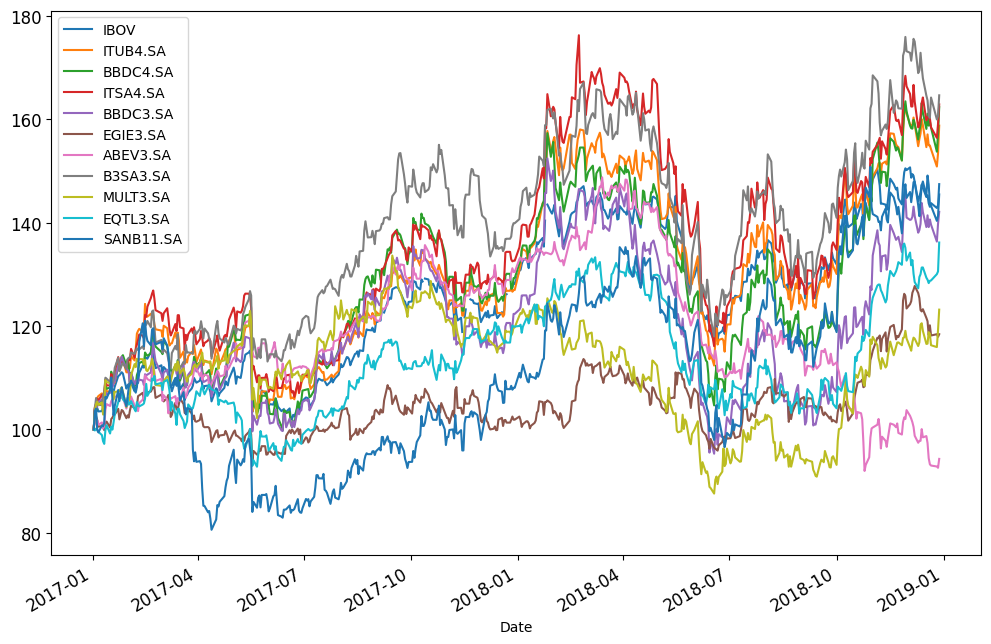

In [61]:
norm_track.plot(figsize=(12,8), fontsize=12)
plt.legend(fontsize=10)
plt.show()

In [62]:
# Dropping the 'IBOV'

tracking_stocks = tracking_stocks[1:]
tracking_stocks

Index(['ITUB4.SA', 'BBDC4.SA', 'ITSA4.SA', 'BBDC3.SA', 'EGIE3.SA', 'ABEV3.SA',
       'B3SA3.SA', 'MULT3.SA', 'EQTL3.SA', 'SANB11.SA'],
      dtype='object')

And this is our portfolio.

## **Tracking Portfolio**